In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Displaying all the Columns
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv(r"D:\DATA SCIENCE\Machine Learning\Regression\CarPrice_project.csv")
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
29,30,3,dodge coronet custom (sw),gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.60,3.90,7.0,145,5000,19,24,12964.0
169,170,2,toyota starlet,gas,std,two,hatchback,rwd,front,98.4,176.2,65.6,52.0,2551,ohc,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9989.0
77,78,2,mitsubishi lancer,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,1944,ohc,four,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6189.0
184,185,2,volkswagen model 111,diesel,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2264,ohc,four,97,idi,3.01,3.40,23.0,52,4800,37,46,7995.0
19,20,1,chevrolet monte carlo,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6295.0


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### DataSet Information:
Car_ID: Unique id of each observation (Interger)

Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)

CarName: Name of car company (Categorical)

fueltype: Car fuel type i.e gas or diesel (Categorical)

aspiration: Aspiration used in a car (Categorical)

doornumber: Number of doors in a car (Categorical)

carbody: body of car (Categorical)

drivewheel: type of drive wheel (Categorical)

enginelocation: Location of car engine (Categorical)

wheelbase: Weelbase of car (Numeric)

carlength: Length of car (Numeric)

carwidth: Width of car (Numeric)

carheight: height of car (Numeric)

curbweight: The weight of a car without occupants or baggage. (Numeric)

enginetype: Type of engine. (Categorical)

cylindernumber: cylinder placed in the car (Categorical)

enginesize: Size of car (Numeric)

fuelsystem: Fuel system of car (Categorical)

boreratio: Boreratio of car (Numeric)

stroke: Stroke or volume inside the engine (Numeric)

compressionratio: compression ratio of car (Numeric)

horsepower: Horsepower (Numeric)

peakrpm: car peak rpm (Numeric)

citympg: Mileage in city (Numeric)

highwaympg: Mileage on highway (Numeric)

price(Dependent variable): Price of car (Numeric)

In [6]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [7]:
df.duplicated().sum()

0

### Exploratory Data Analysis

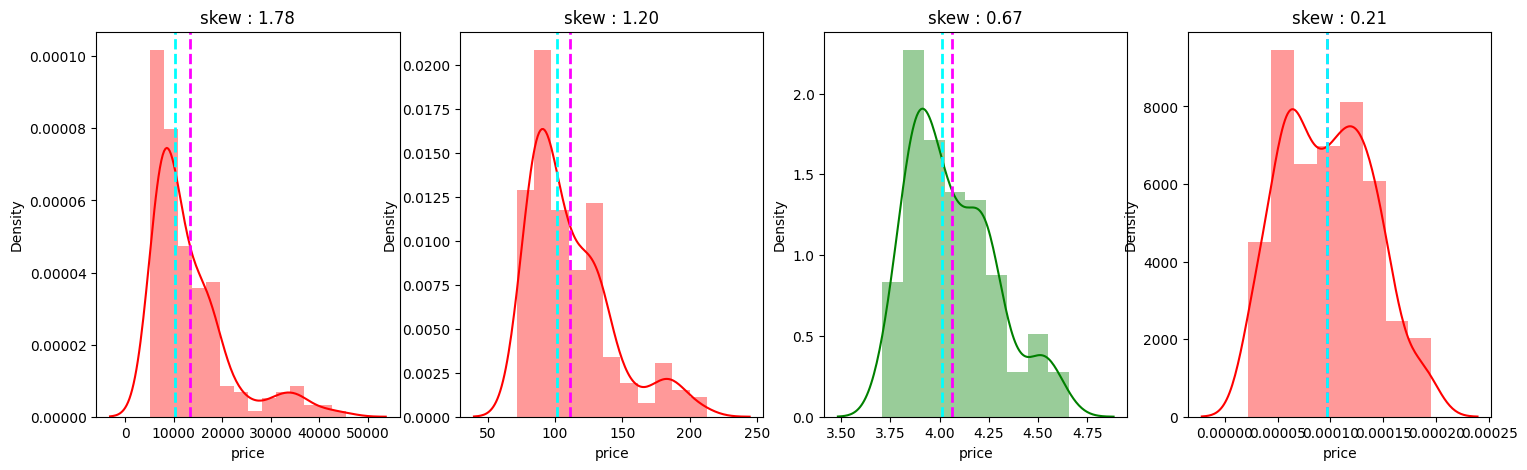

In [8]:
# Dependent variable 'Price'
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(18,5))
sns.distplot(df['price'],kde=True,ax=ax1,color='red')  # original data : moderately positively skewed
ax1.set_title(f'skew : {df["price"].skew():.2f}')
ax1.axvline(df["price"].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax1.axvline(df["price"].median(), color='cyan', linestyle='dashed', linewidth=2)    


sns.distplot(np.sqrt(df['price']),kde=True,ax=ax2,color='red')  # used when data is  lightly skewed
ax2.set_title(f'skew : {np.sqrt(df["price"]).skew():.2f}')
ax2.axvline(np.sqrt(df["price"]).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax2.axvline(np.sqrt(df["price"]).median(), color='cyan', linestyle='dashed', linewidth=2)    


sns.distplot(np.log10(df['price']),kde=True,ax=ax3,color='green') # used when data is  moderately skewed
ax3.set_title(f'skew : {np.log10(df["price"]).skew():.2f}')
ax3.axvline(np.log10(df["price"]).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax3.axvline(np.log10(df["price"]).median(), color='cyan', linestyle='dashed', linewidth=2)    


sns.distplot(np.reciprocal(df['price']),kde=True,ax=ax4,color='red') # used when data is highly skewed
ax4.set_title(f'skew : {np.reciprocal(df["price"]).skew():.2f}')
ax4.axvline(np.reciprocal(df["price"]).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax4.axvline(np.reciprocal(df["price"]).median(), color='cyan', linestyle='dashed', linewidth=2)    


plt.show()

In [9]:
# Numerical Columns
numeric_features = df.describe().columns
numeric_features

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

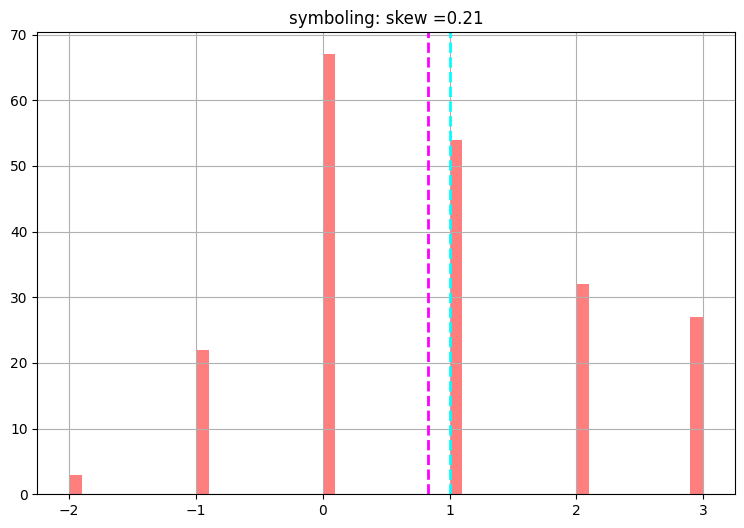

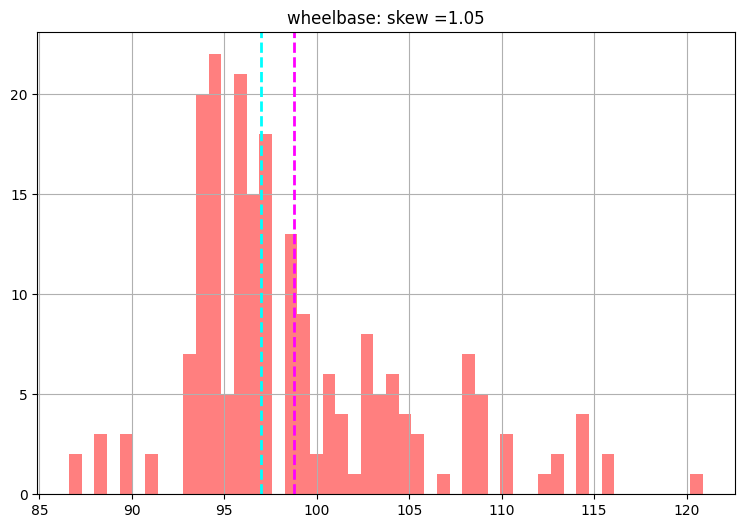

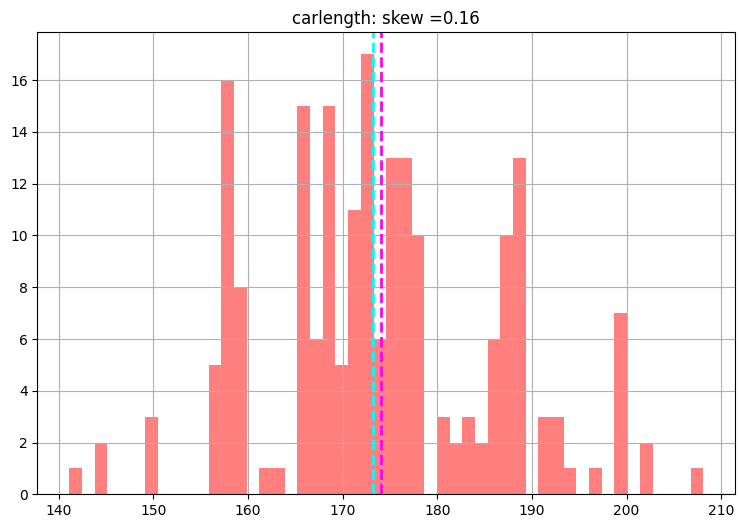

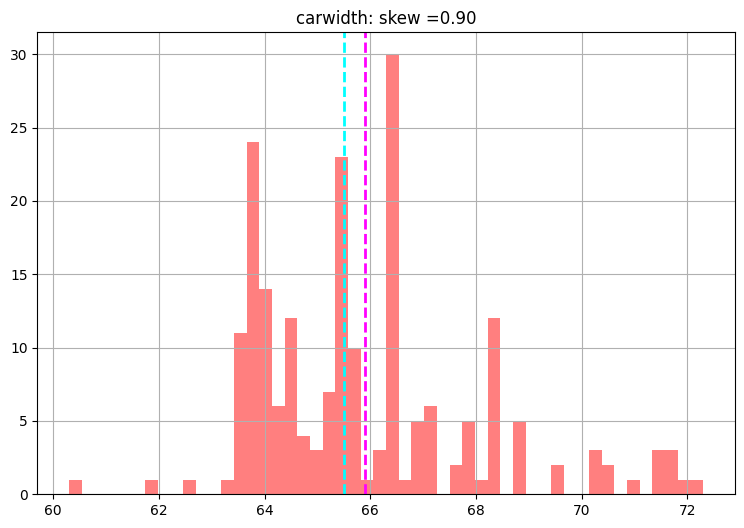

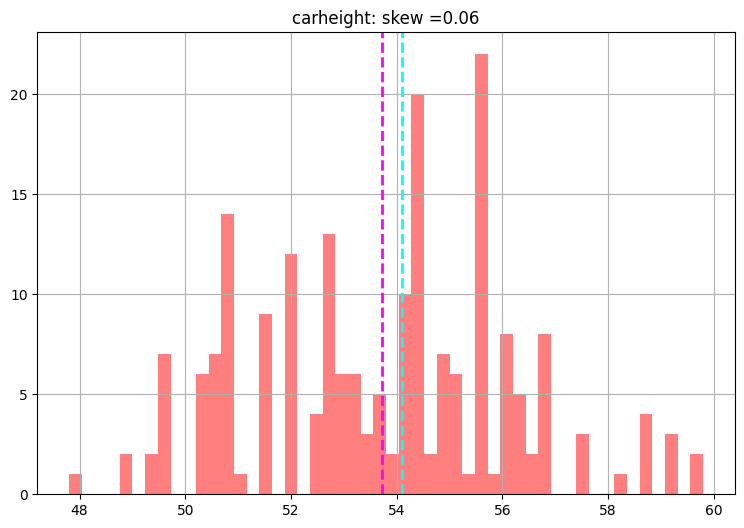

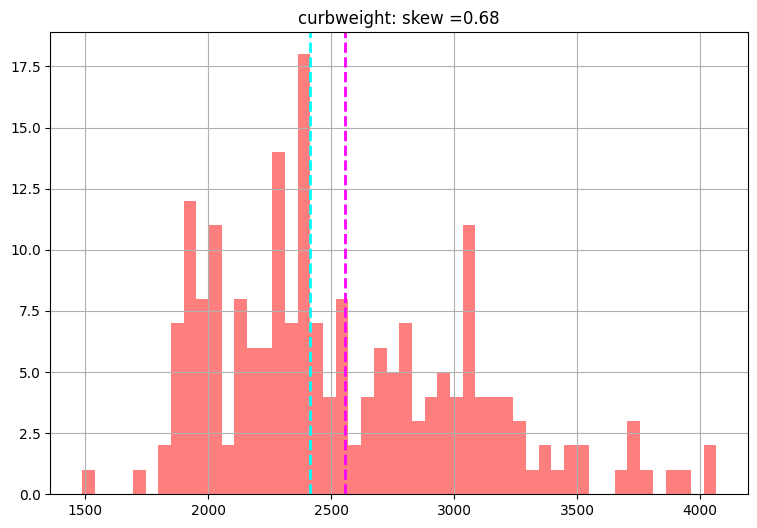

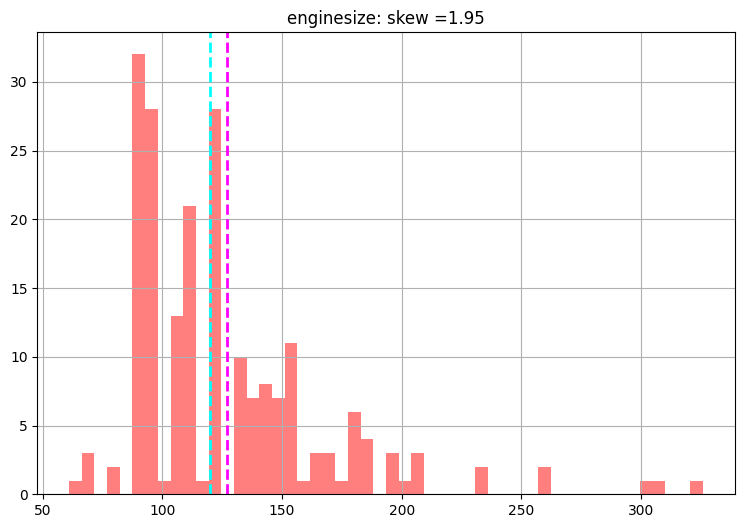

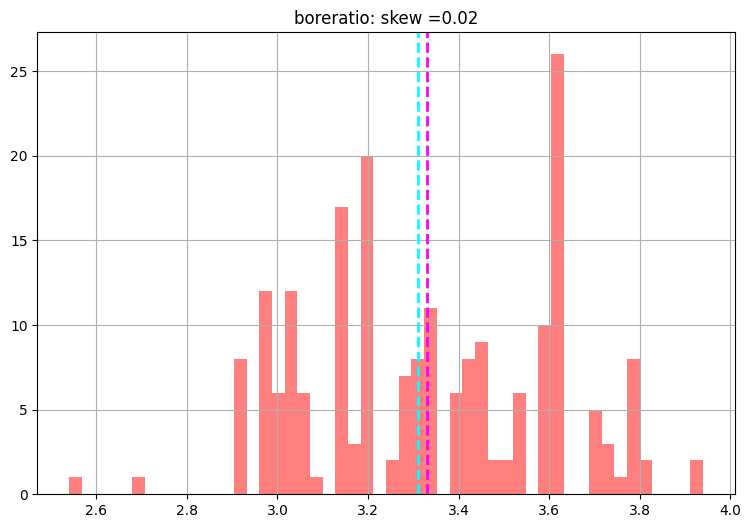

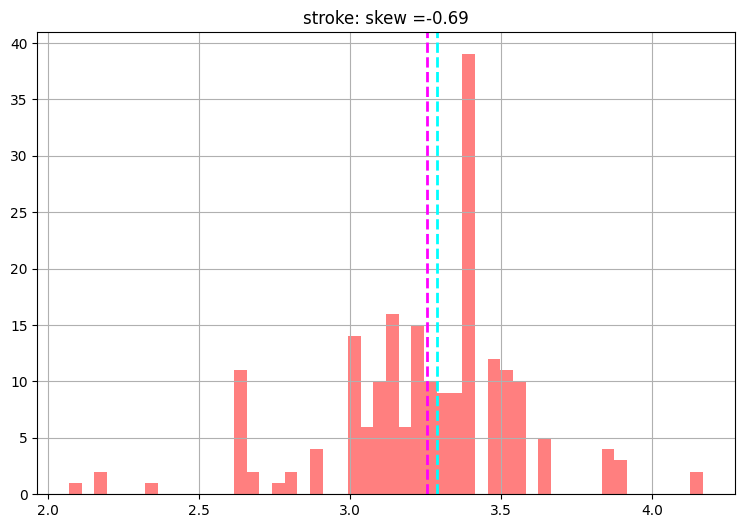

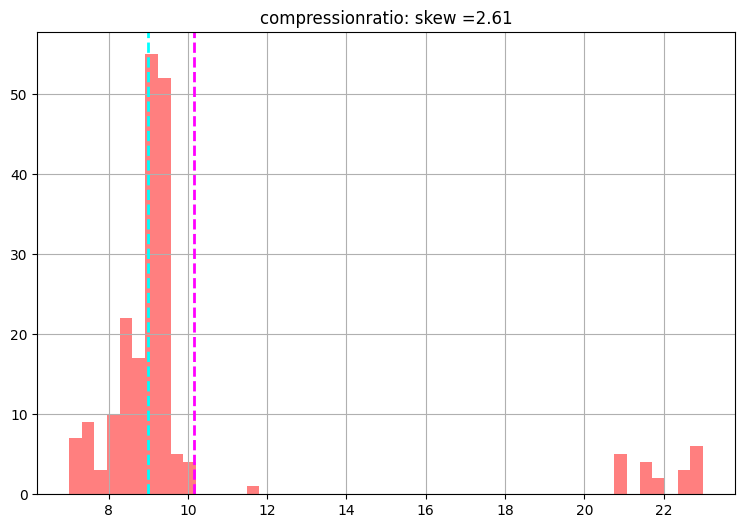

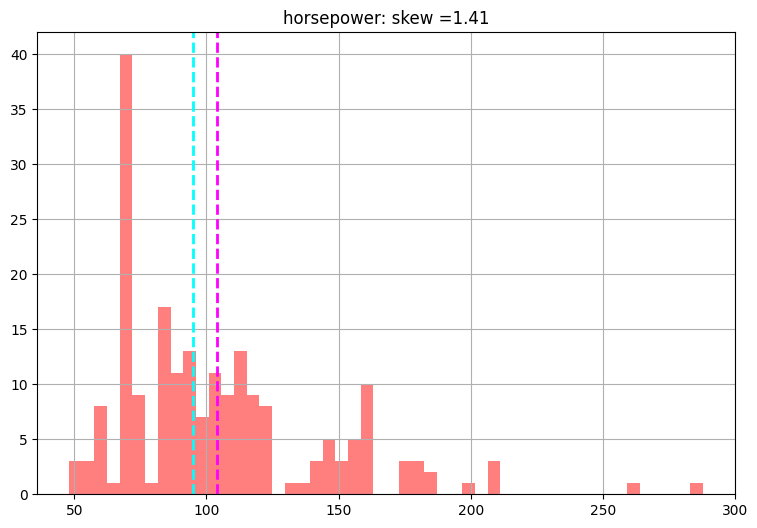

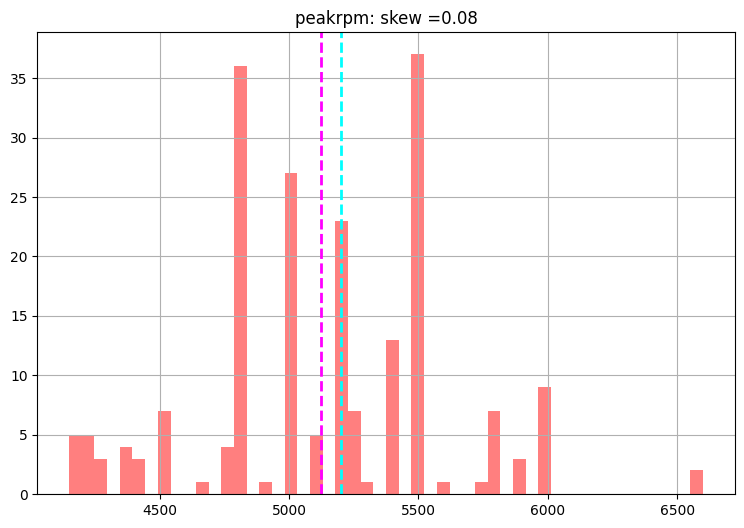

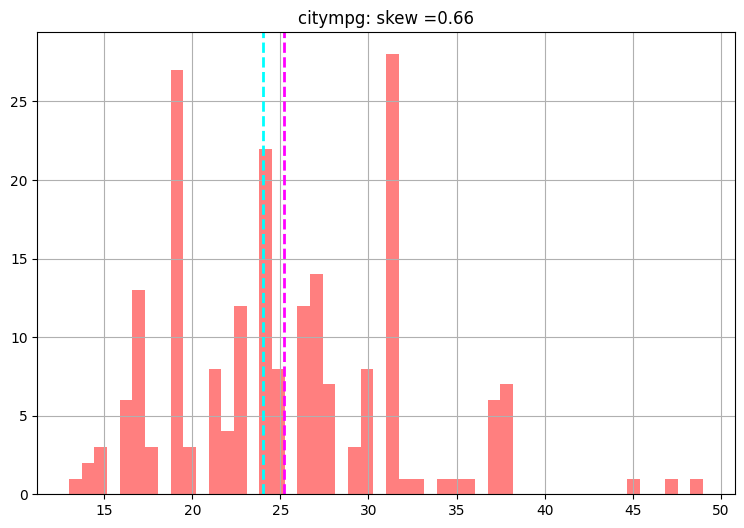

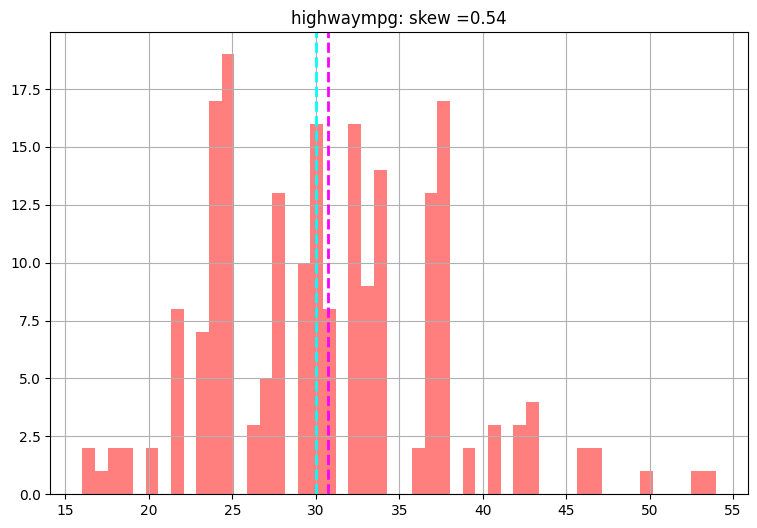

In [10]:
for col in numeric_features:
    if col not in ['car_ID','price']:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        feature = df[col]
        feature.hist(bins=50, ax = ax,color='red',alpha=0.5)
        ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
        ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
        ax.set_title(f'{col}: skew ={ feature.skew():.2f}')
plt.show()
    

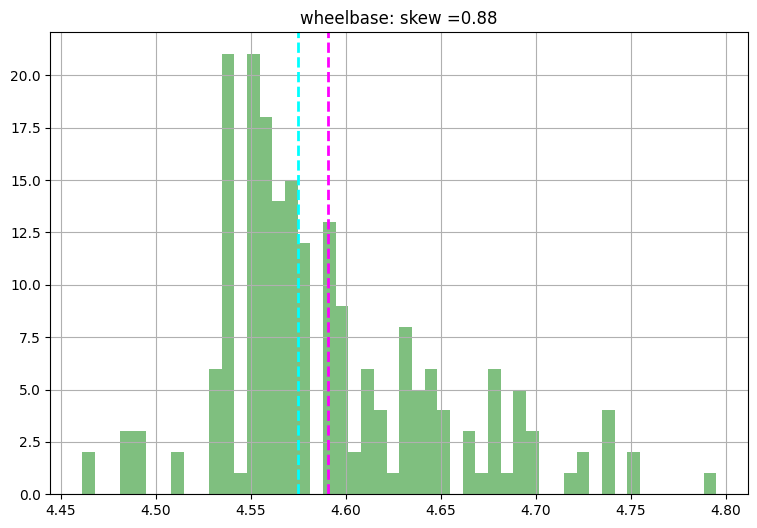

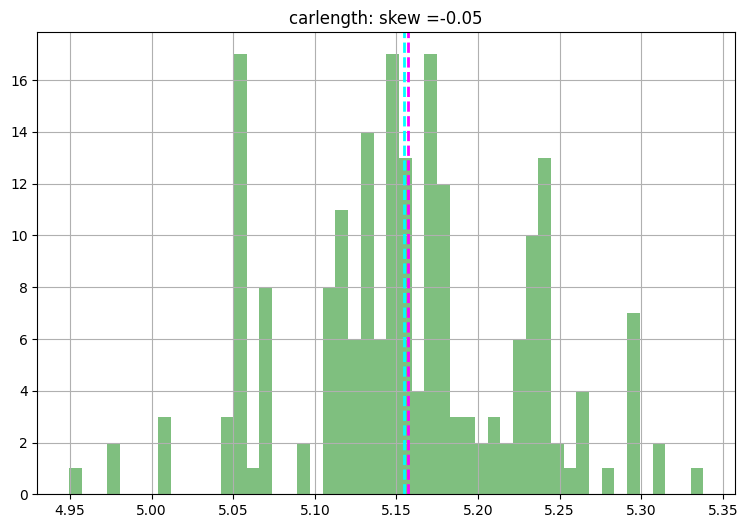

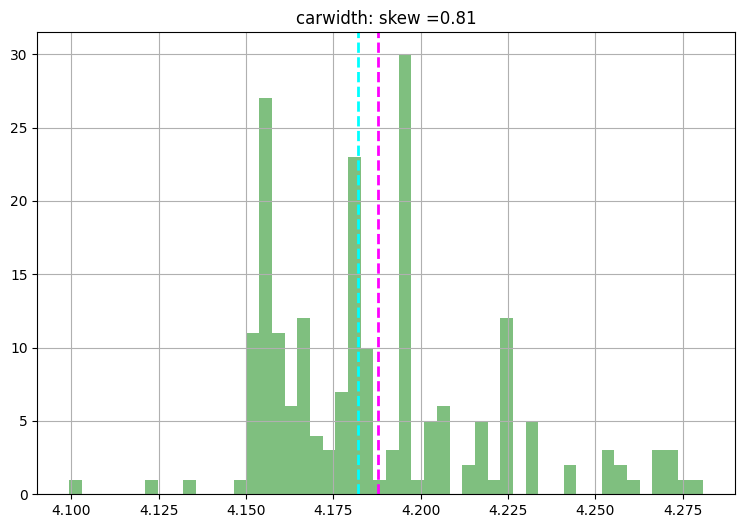

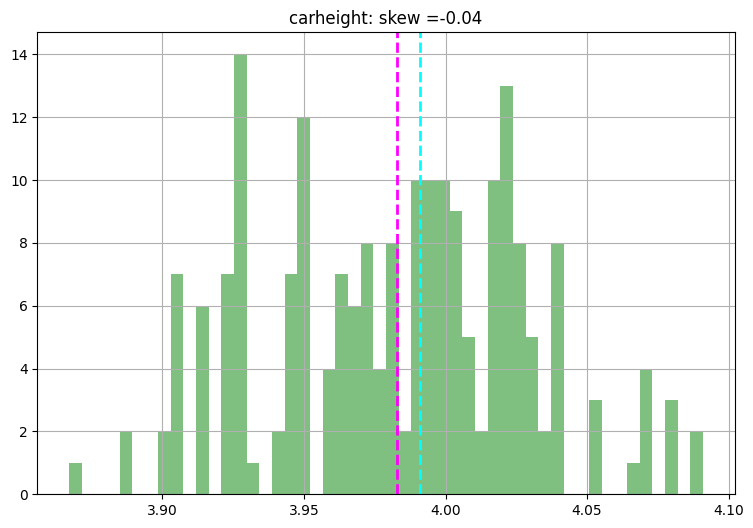

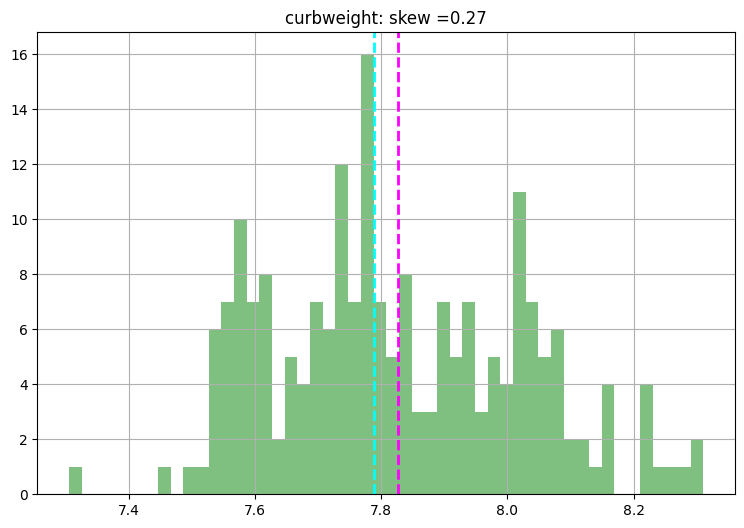

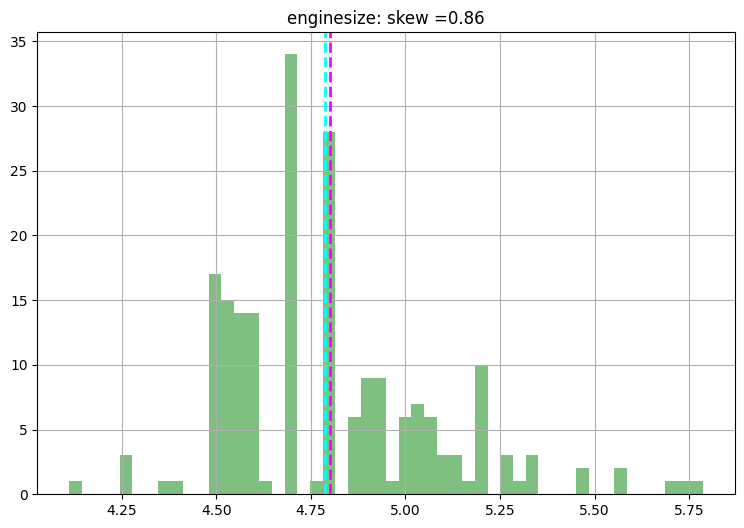

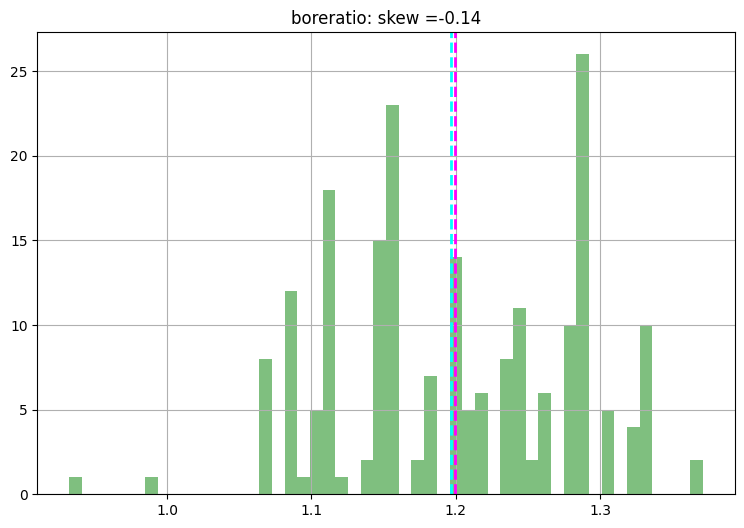

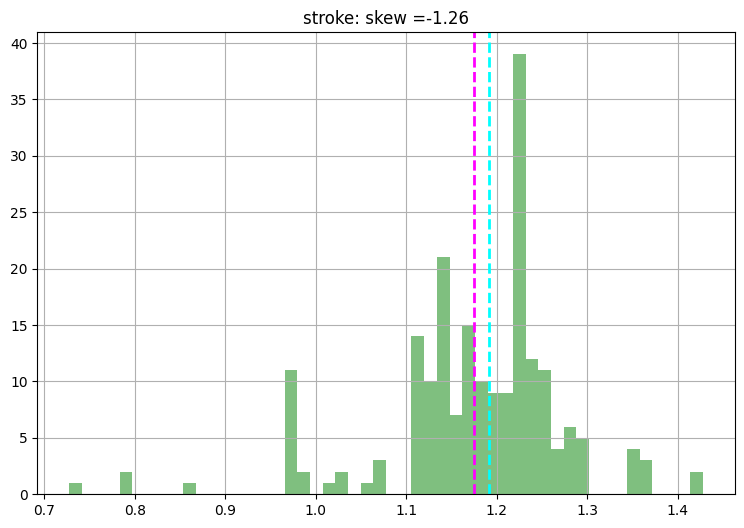

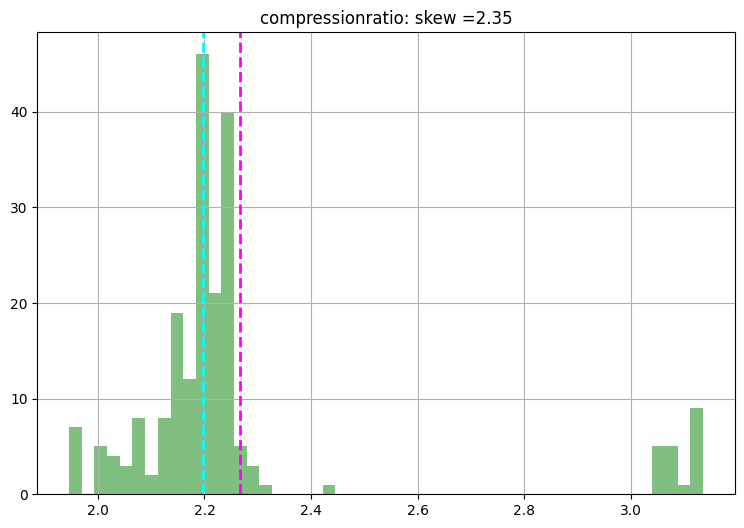

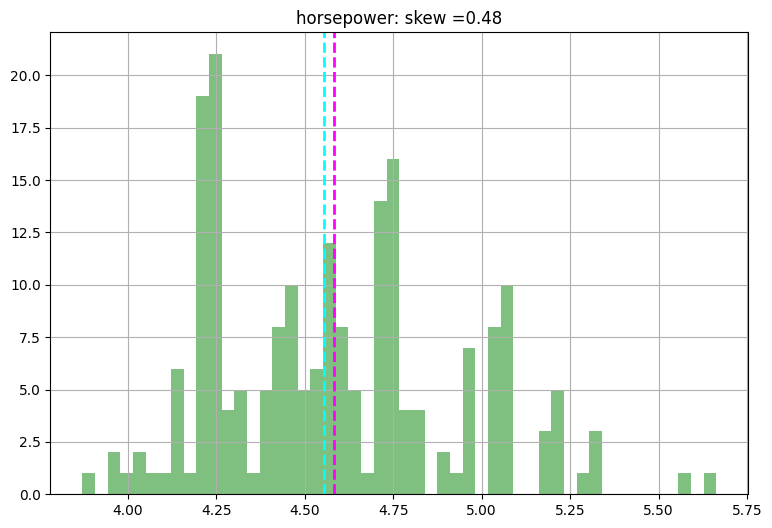

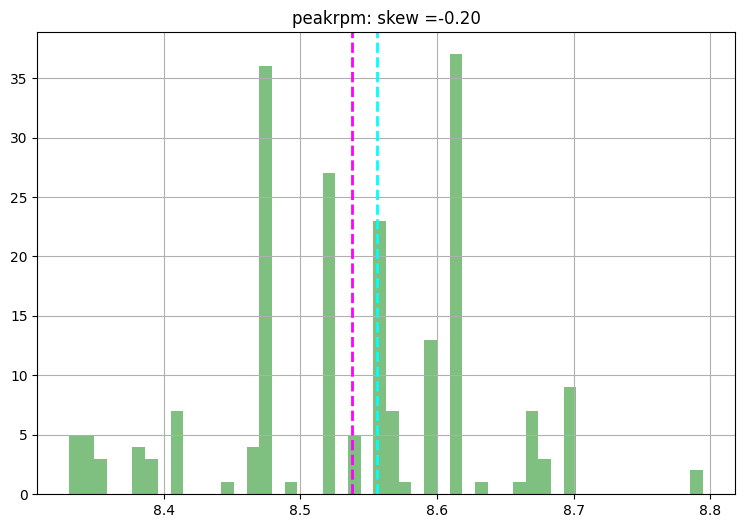

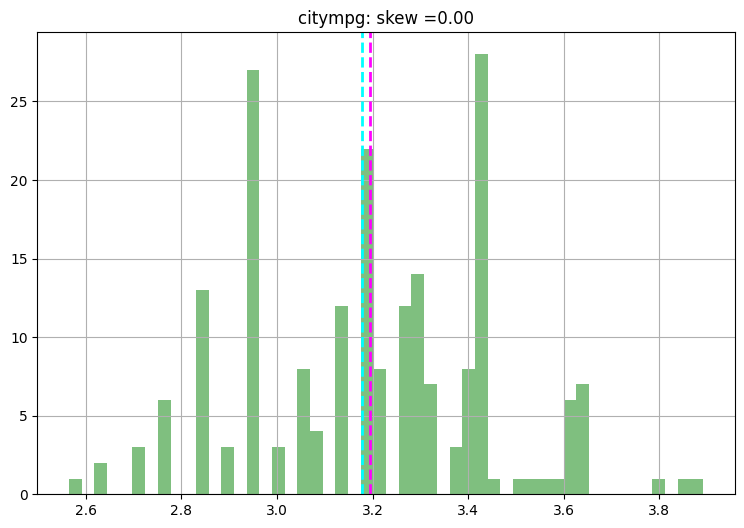

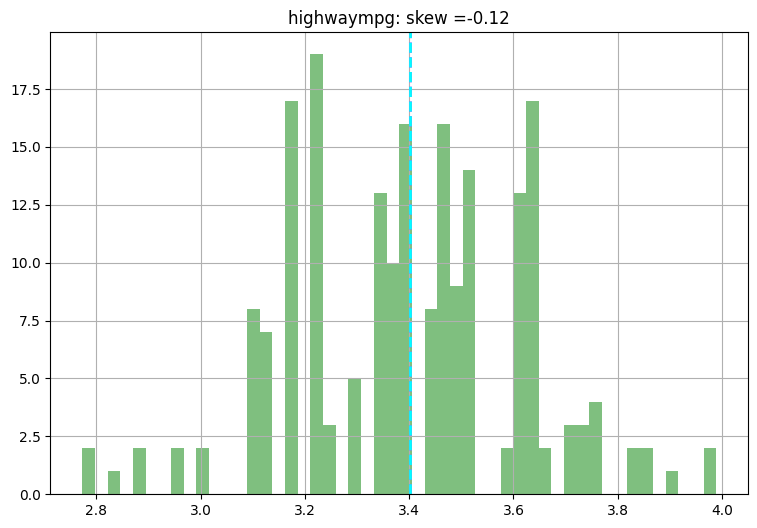

In [11]:
#log transformation
for col in numeric_features:
    if col not in ['car_ID','price','symboling']:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        feature = np.log(df[col])
        feature.hist(bins=50, ax = ax,color='green',alpha=0.5)
        ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
        ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
        ax.set_title(f'{col}: skew ={ feature.skew():.2f}')
plt.show()

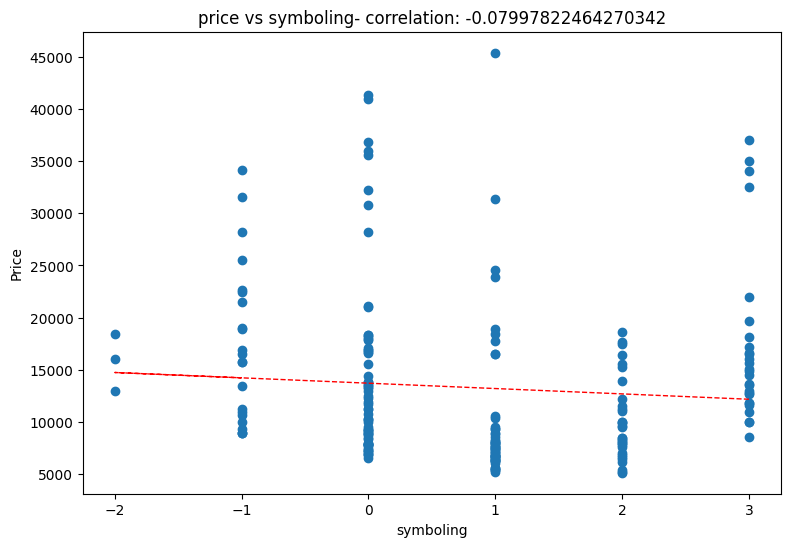

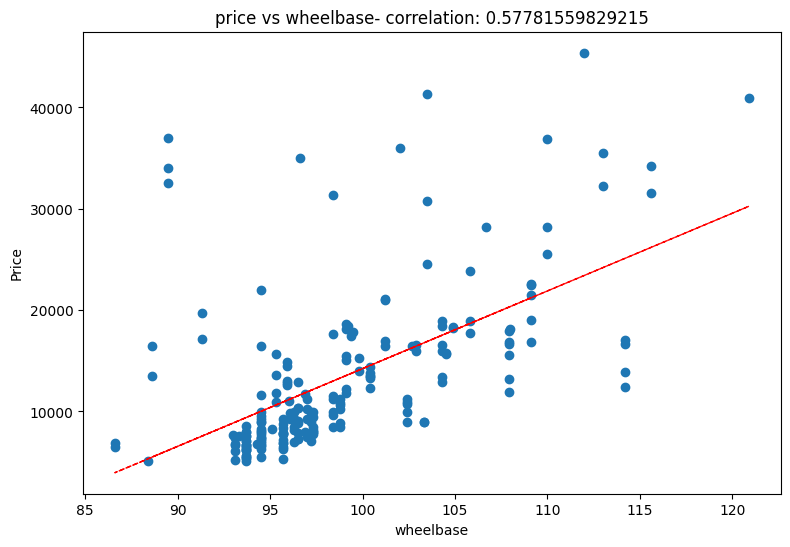

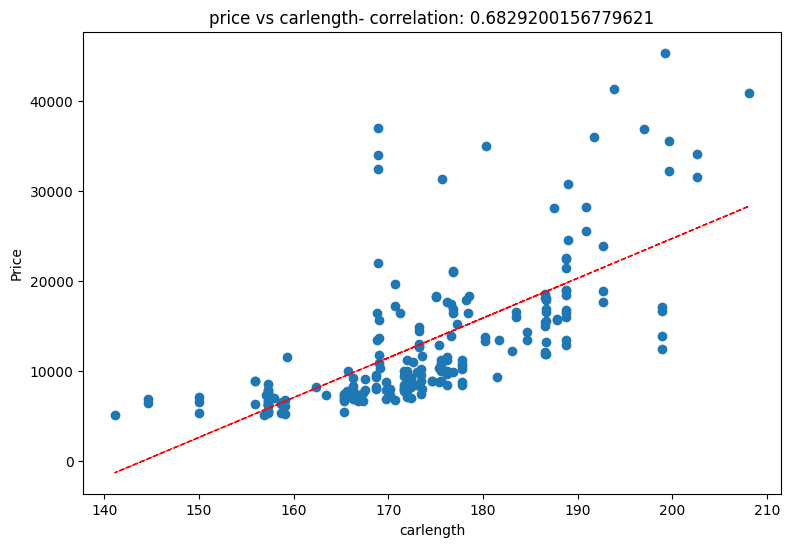

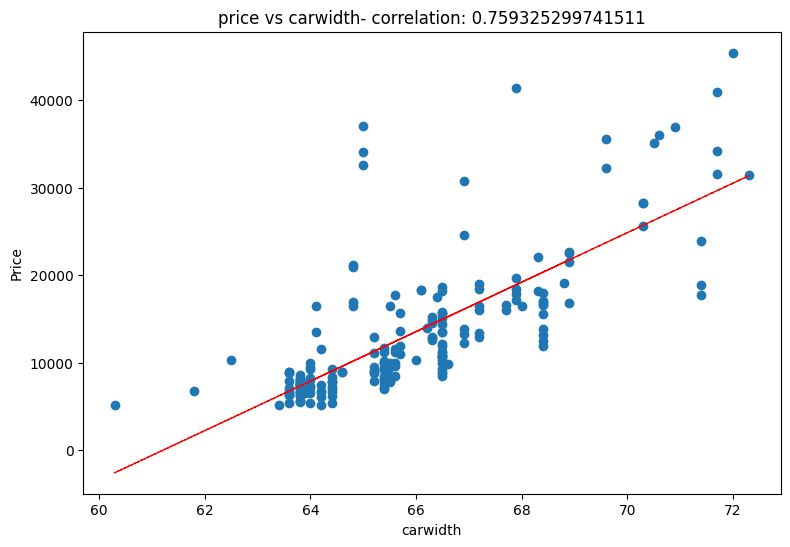

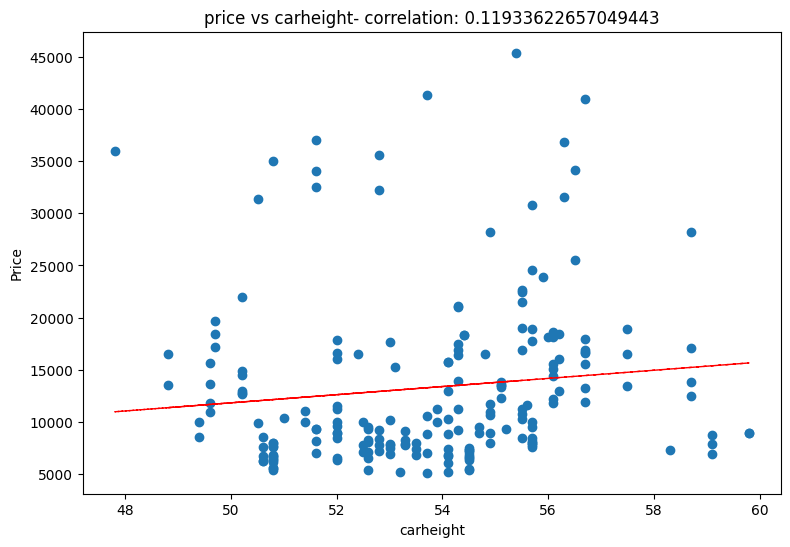

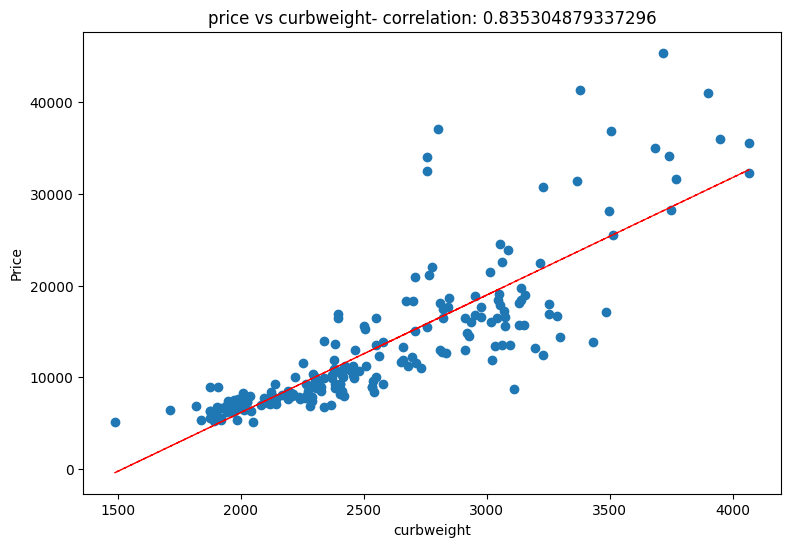

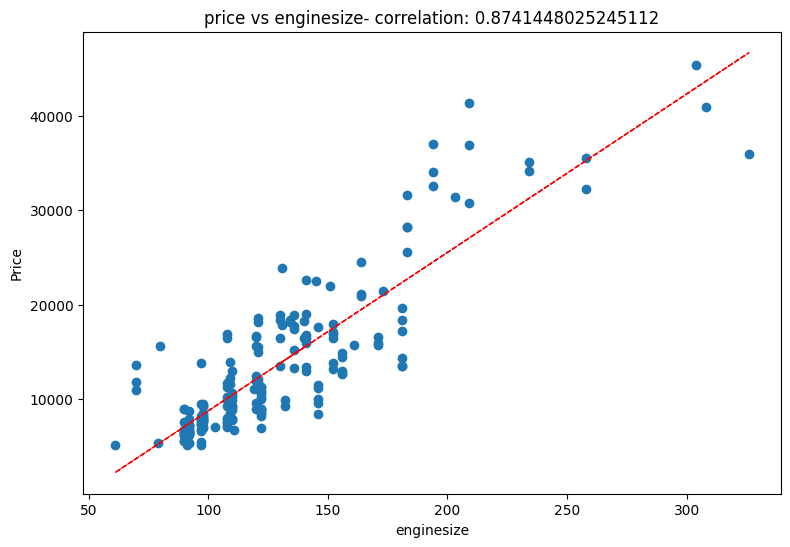

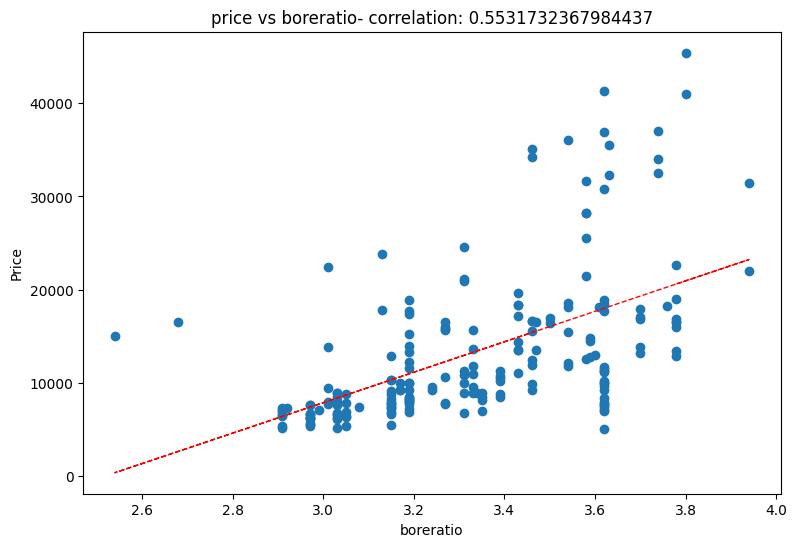

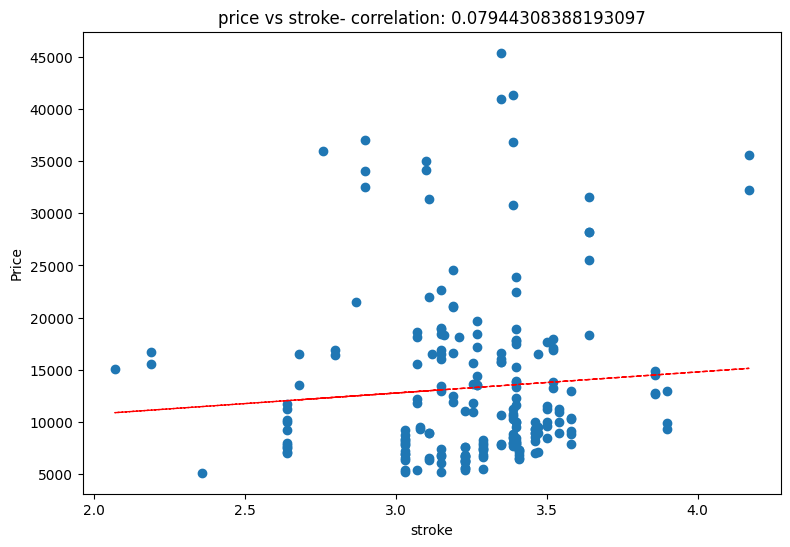

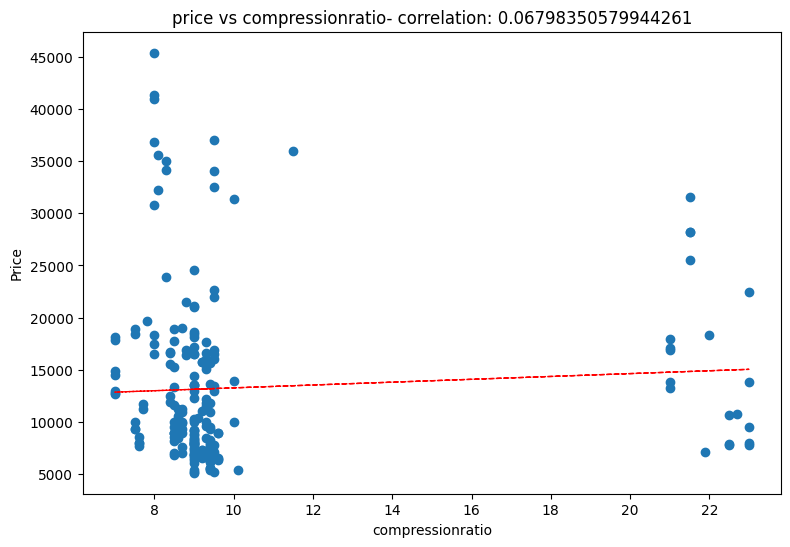

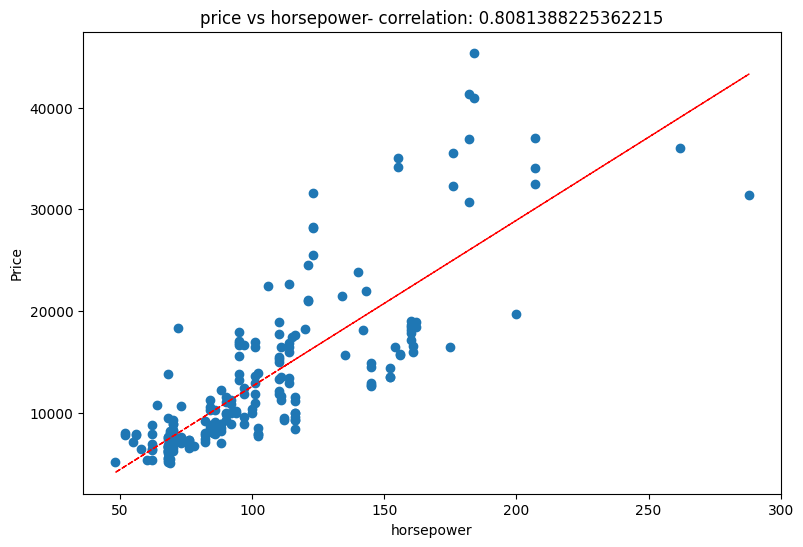

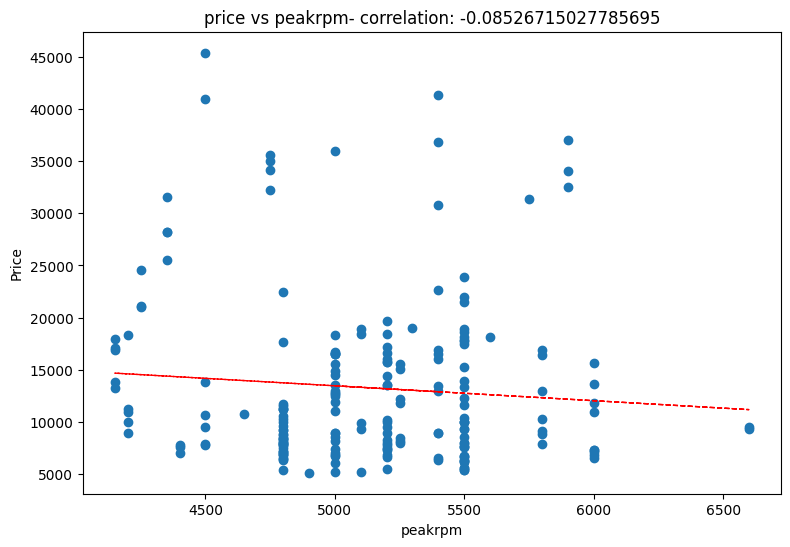

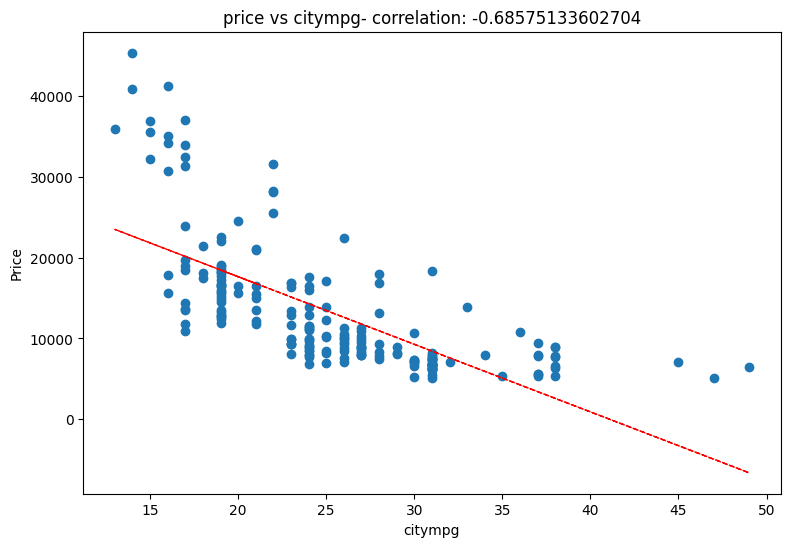

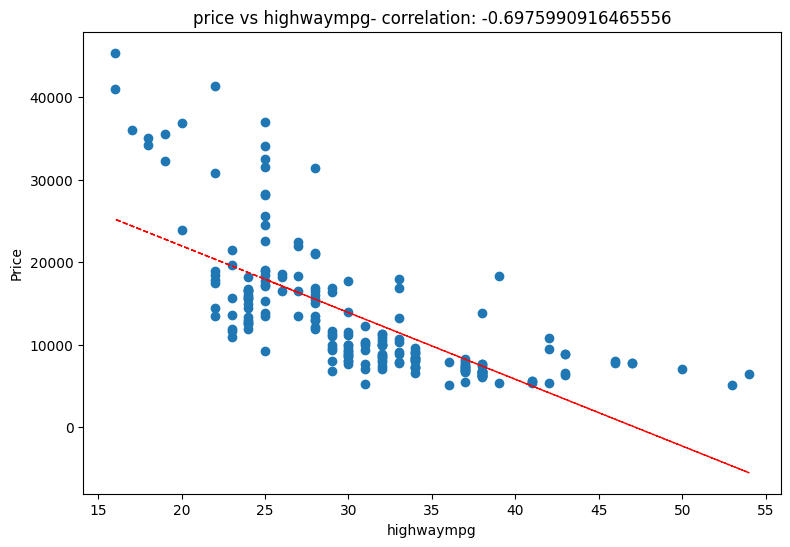

In [12]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['price'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col],y_hat, "r--",lw=1)   # lw : line width

plt.show()
    
    

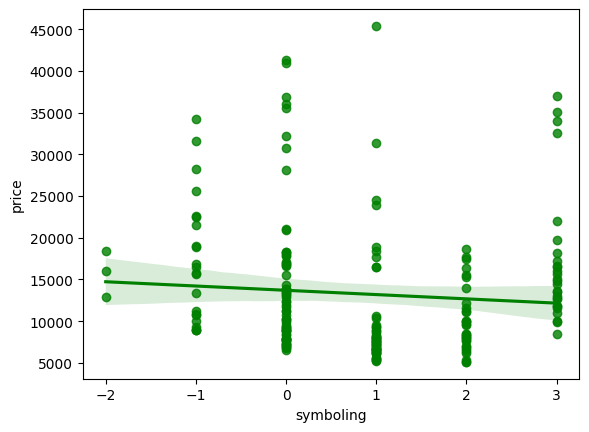

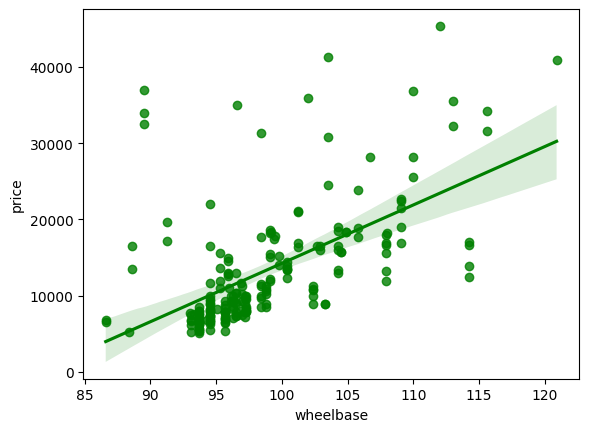

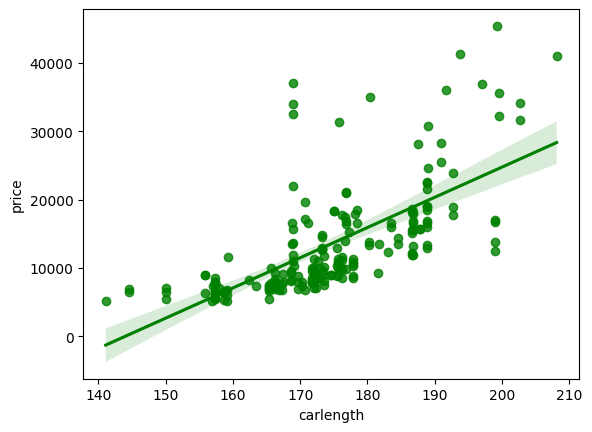

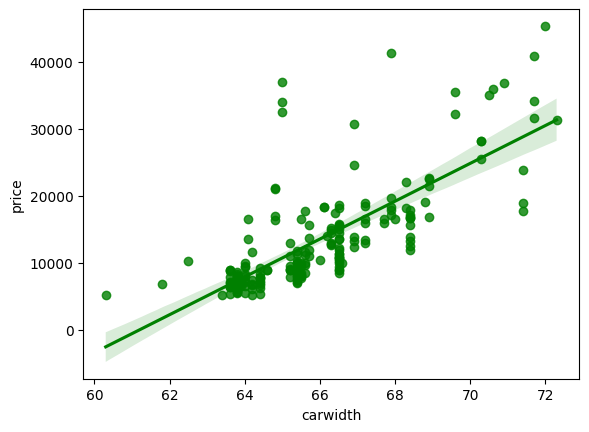

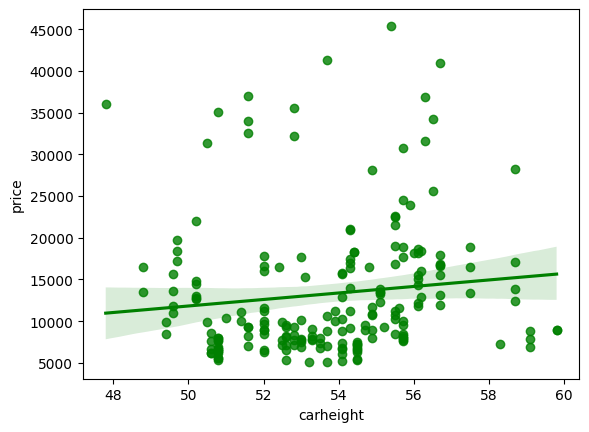

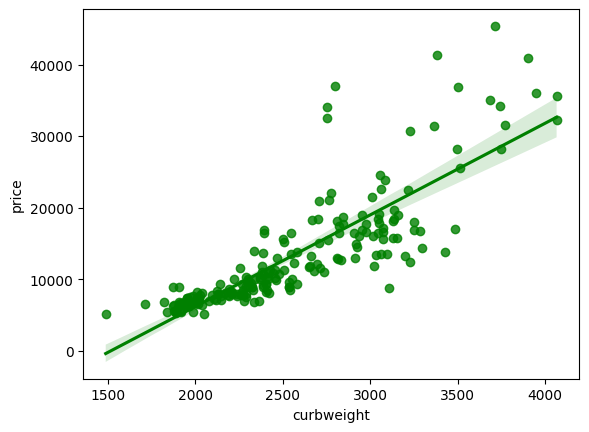

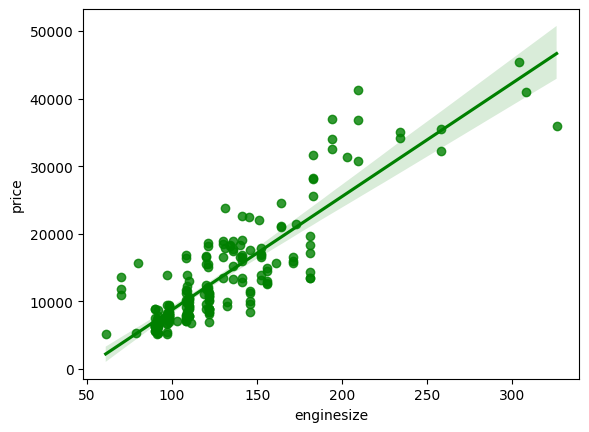

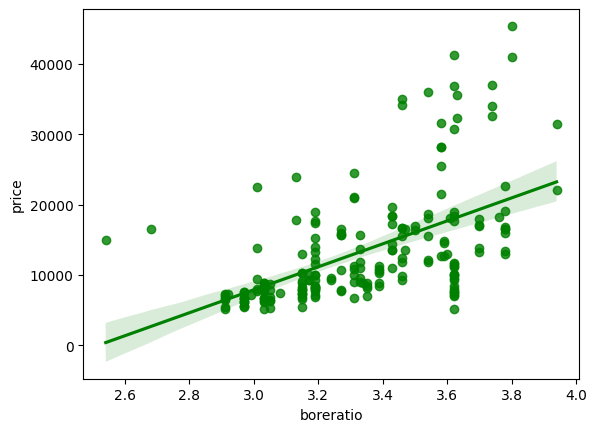

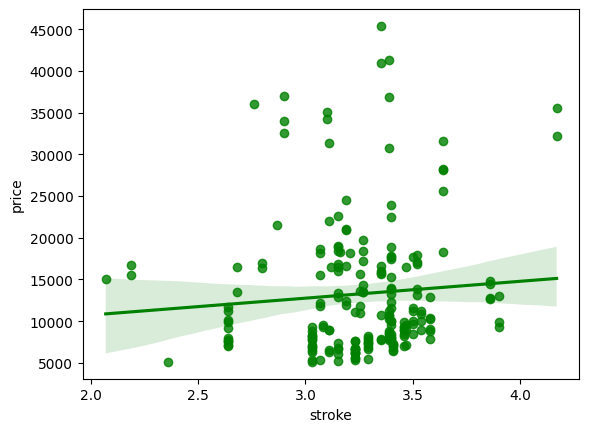

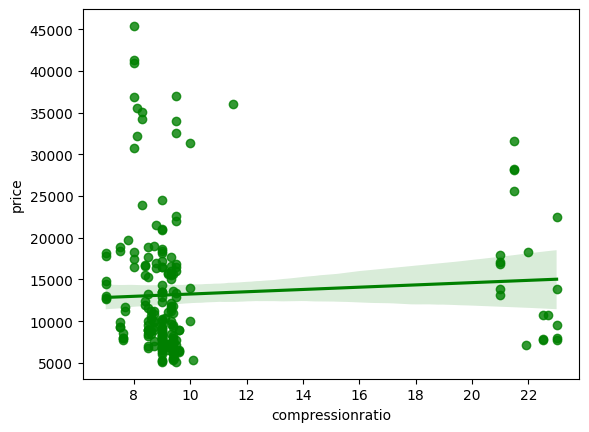

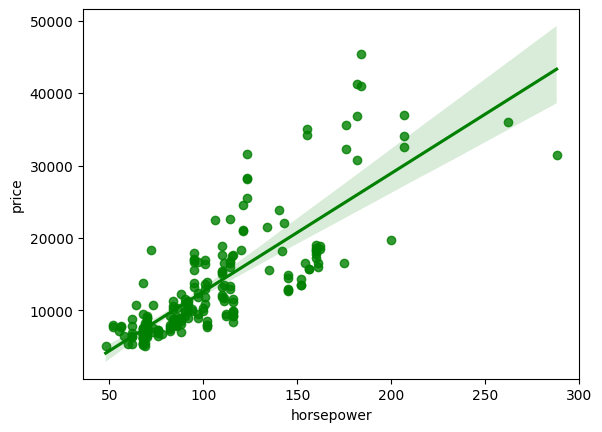

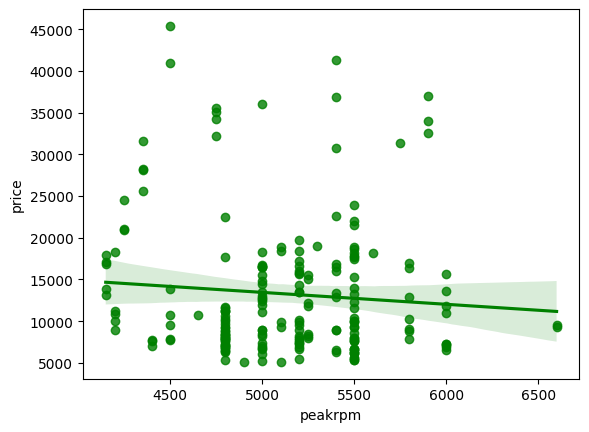

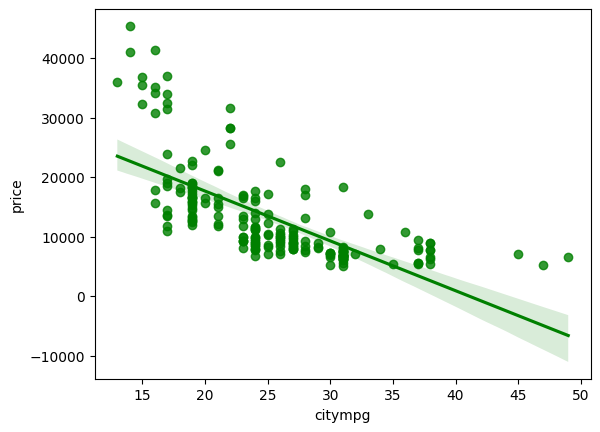

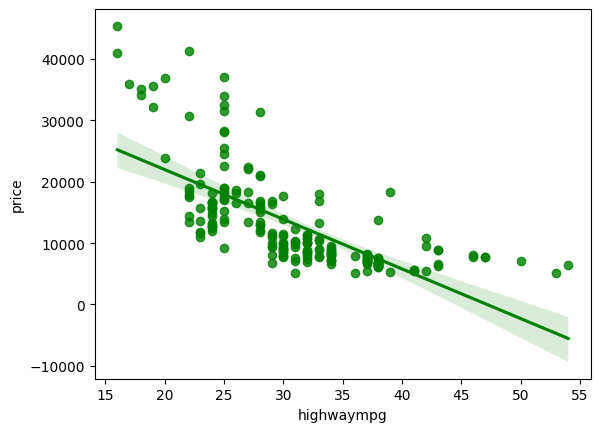

In [13]:
#alternatively
for col in numeric_features[1:-1]:
    sns.regplot(x=col,y='price',data=df,color='g')
    plt.show()

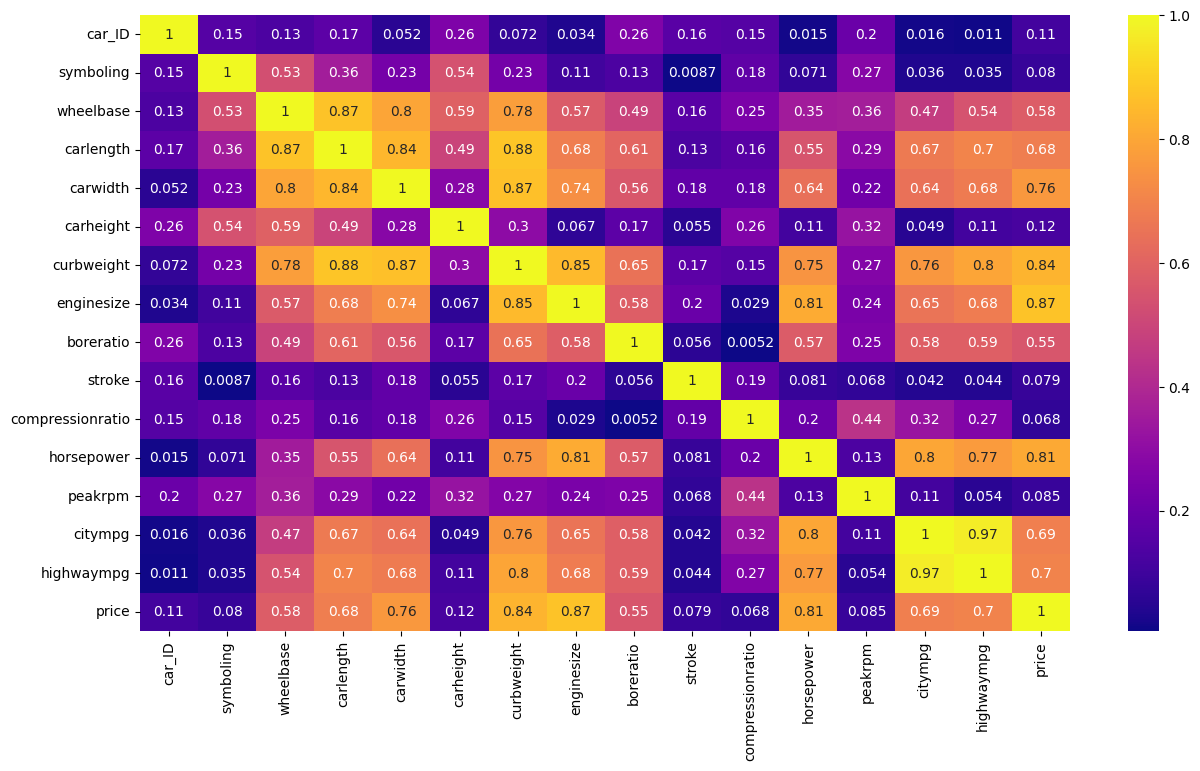

In [14]:
# Correlation
plt.figure(figsize=(15,8))
correlation = df[numeric_features].corr()
sns.heatmap(abs(correlation), annot=True, cmap='plasma')
plt.show()

In [15]:
# Creating new columns:
df['mileage'] = 0.6*df['citympg'] + 0.4*df['highwaympg']
df['car_area'] = df['carlength']*df['carwidth']

In [16]:
#Multicollinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):
    # Calculating VIF
    vif=pd.DataFrame()
    vif['variable']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif

In [17]:
cal_vif(df[[i for i in df.describe().columns if i not in ['car_ID','price']]])

,variable,VIF
0,symboling,2.646796
1,wheelbase,2316.959780
2,carlength,6136.028870
3,carwidth,3170.397591
4,carheight,1108.503341
5,curbweight,415.172460
6,enginesize,68.941339
7,boreratio,326.471548
8,stroke,132.074737
9,compressionratio,16.465709


In [18]:
# Bringing VIF under 10 :
cal_vif(df[[i for i in df.describe().columns if i not in ['car_ID','symboling','price','citympg','highwaympg','company_cat','price_mean','carwidth','carlength','carheight','car_vol','car_den','wheelbase','car_area','peakrpm','stroke','horsepower','boreratio','curbweight']]])

,variable,VIF
0,enginesize,5.170320
1,compressionratio,9.119143
2,mileage,8.201171


In [19]:
numerical_features = ['enginesize','compressionratio','mileage']

In [20]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [21]:
df['company']= df['CarName'].str.split(" ",expand=True)[0]
df['company']= df['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})

In [22]:
df['company'] = df['company'].str.title()

In [23]:
df['company'].value_counts()

company
Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Volkswagen     12
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Jaguar          3
Chevrolet       3
Alfa-Romero     3
Renault         2
Mercury         1
Name: count, dtype: int64

In [24]:
df.drop('CarName',axis=1,inplace=True)

In [25]:
#Categorical columns
categorical_features= df.describe(include=['object','category']).columns

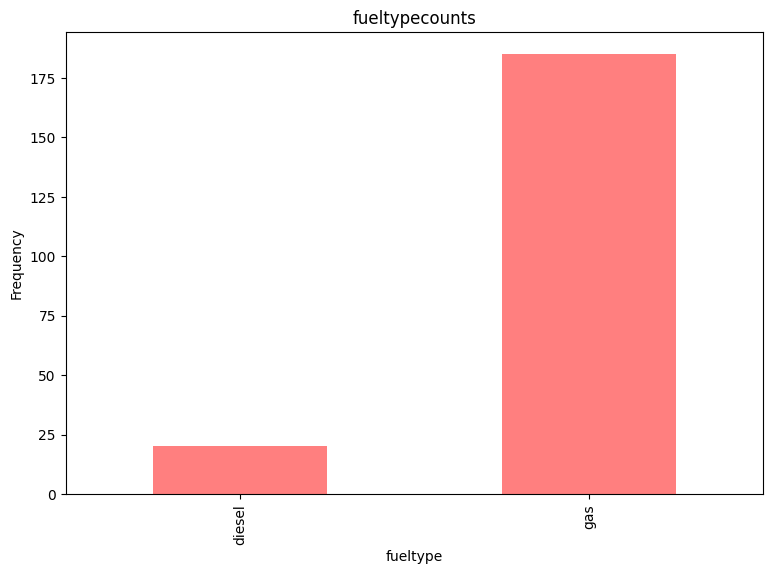

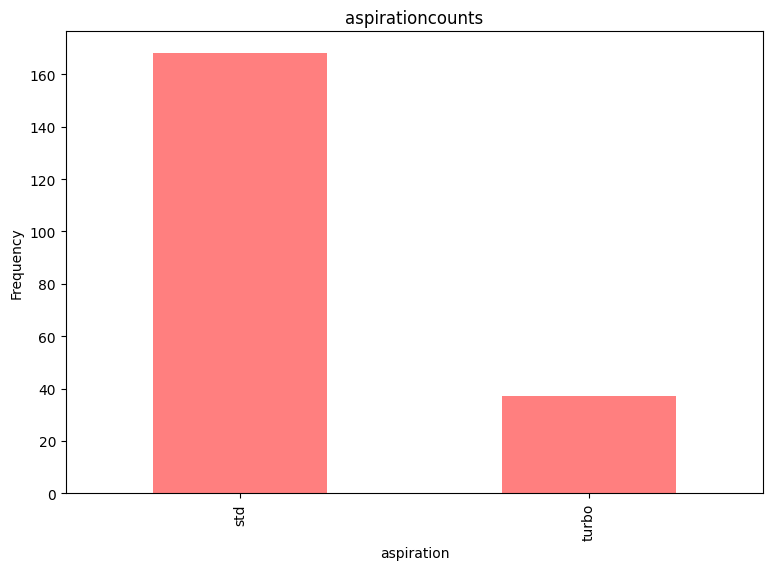

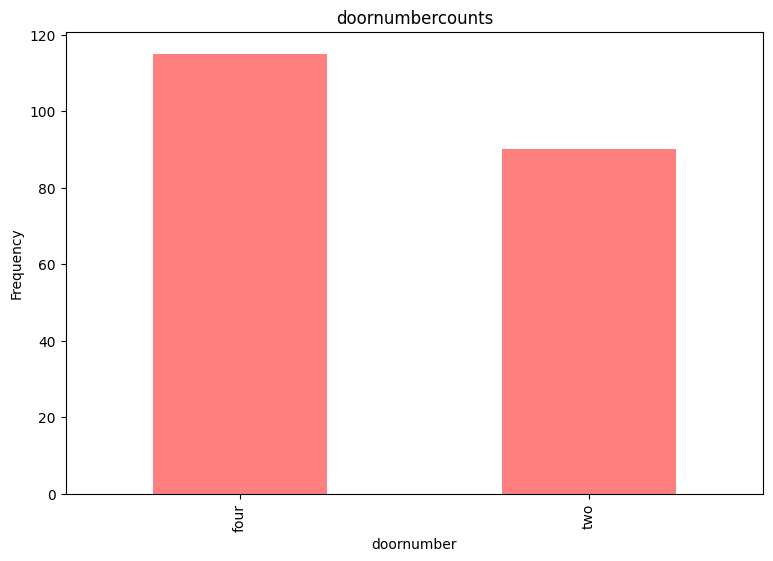

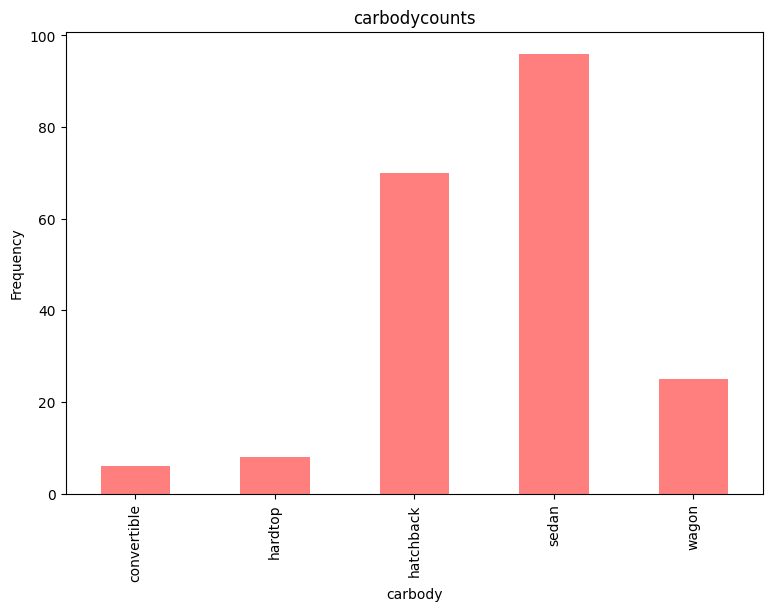

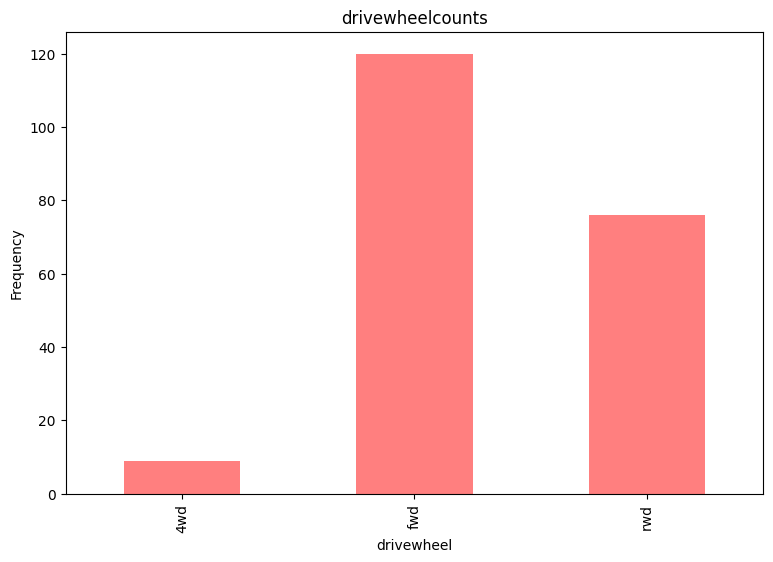

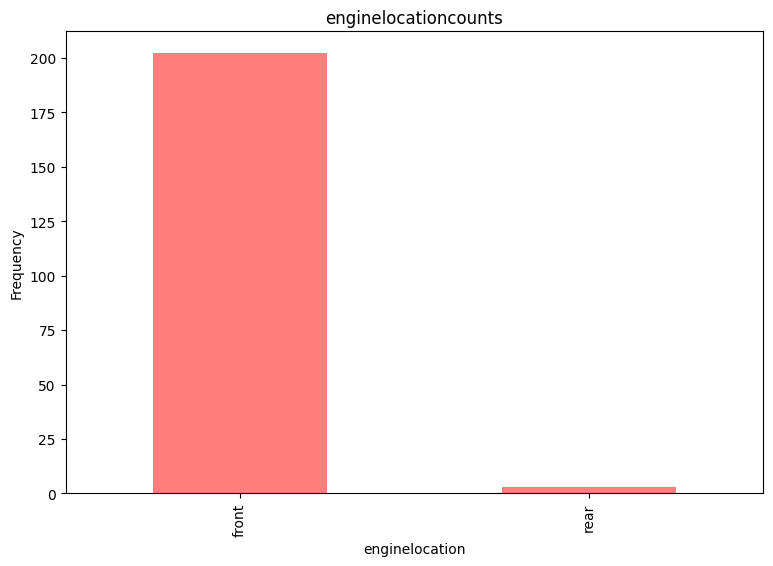

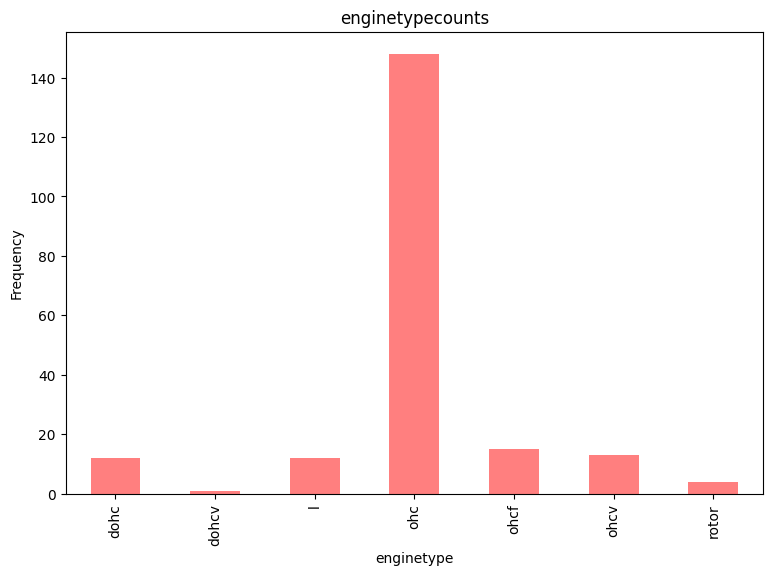

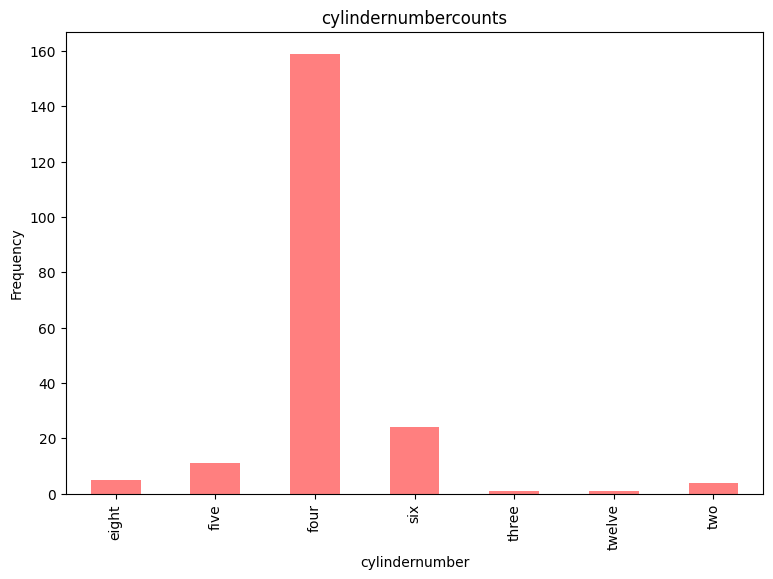

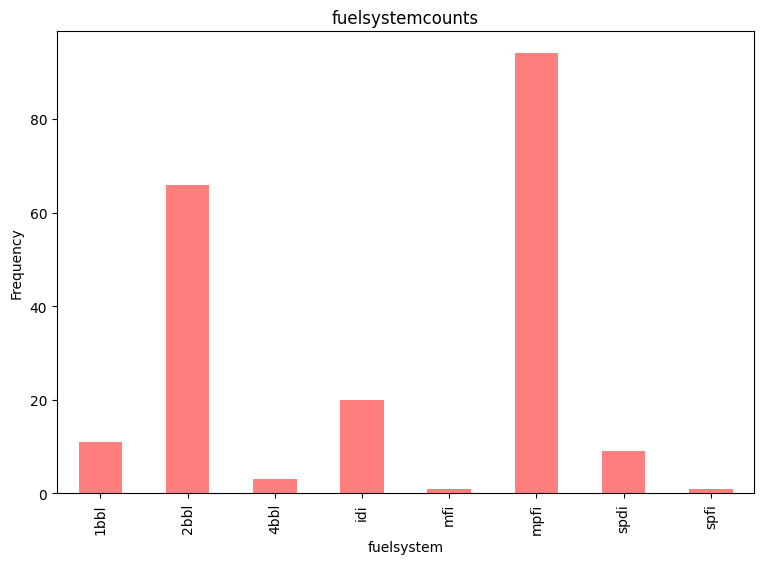

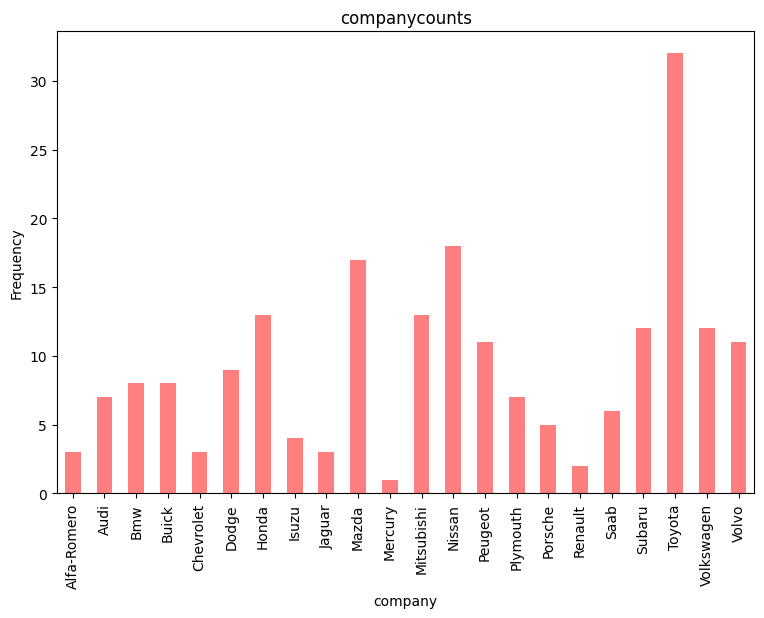

In [26]:
for col in categorical_features:
    counts=df[col].value_counts().sort_index()
    fig= plt.figure(figsize=(9,6))
    ax=fig.gca()
    counts.plot.bar(ax=ax,color='red',alpha=0.5)
    ax.set_title(col + 'counts')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    plt.show()

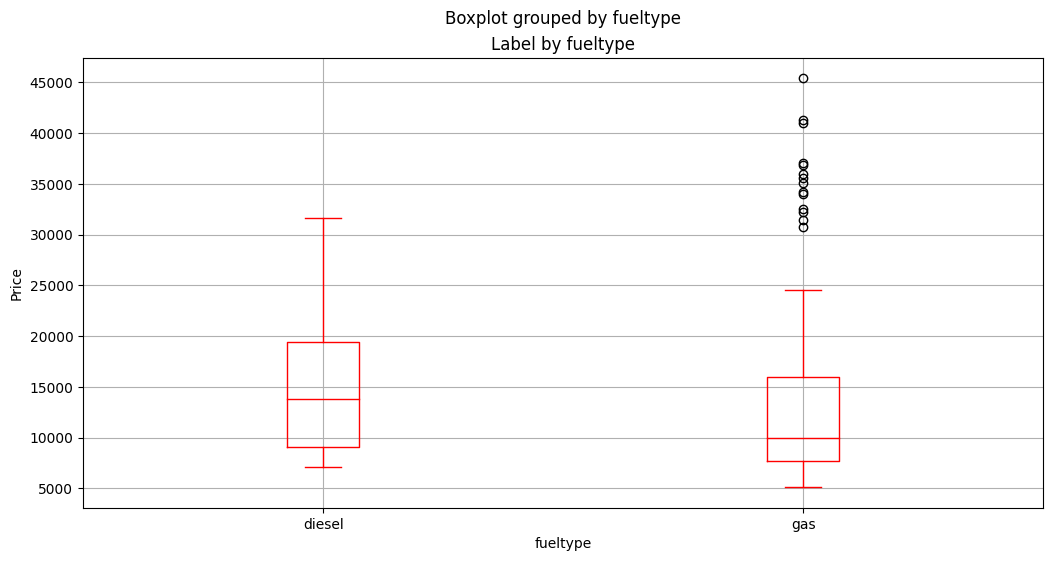

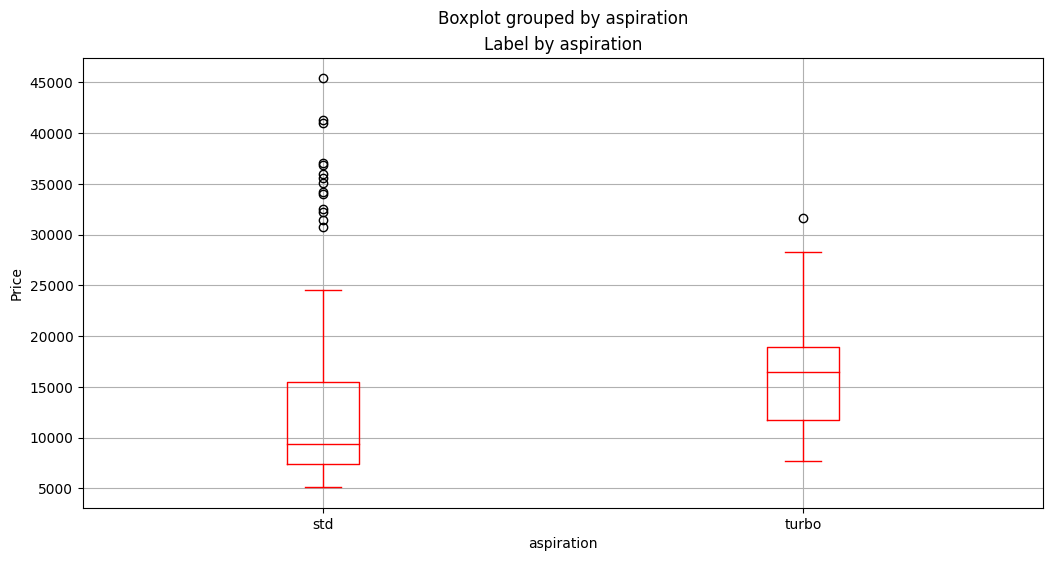

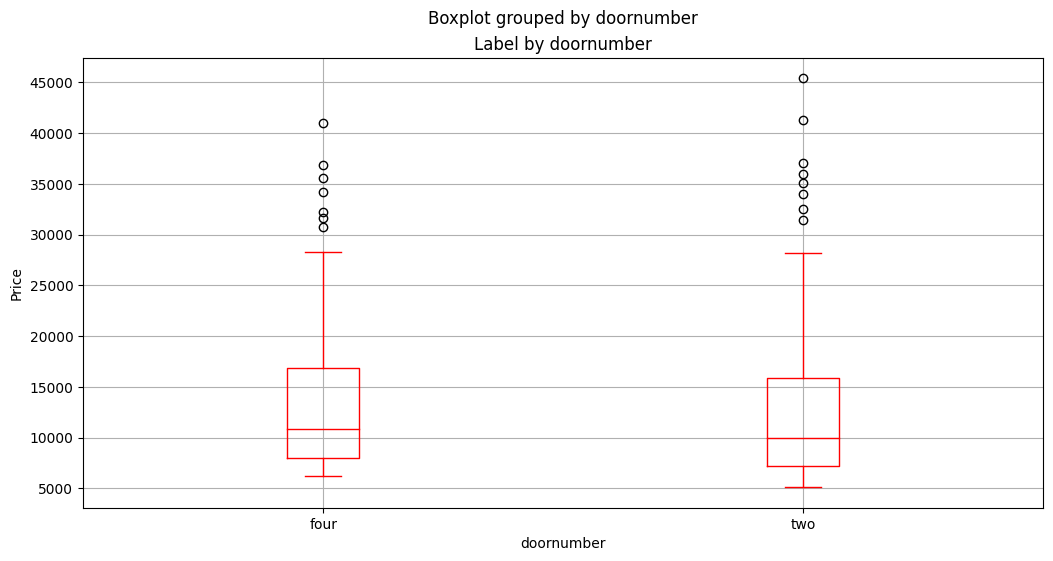

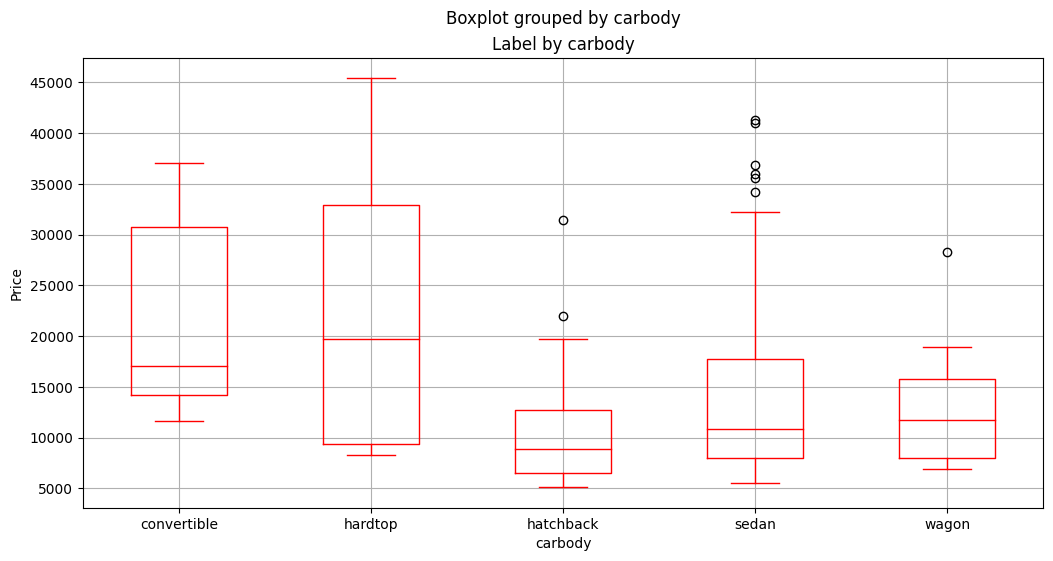

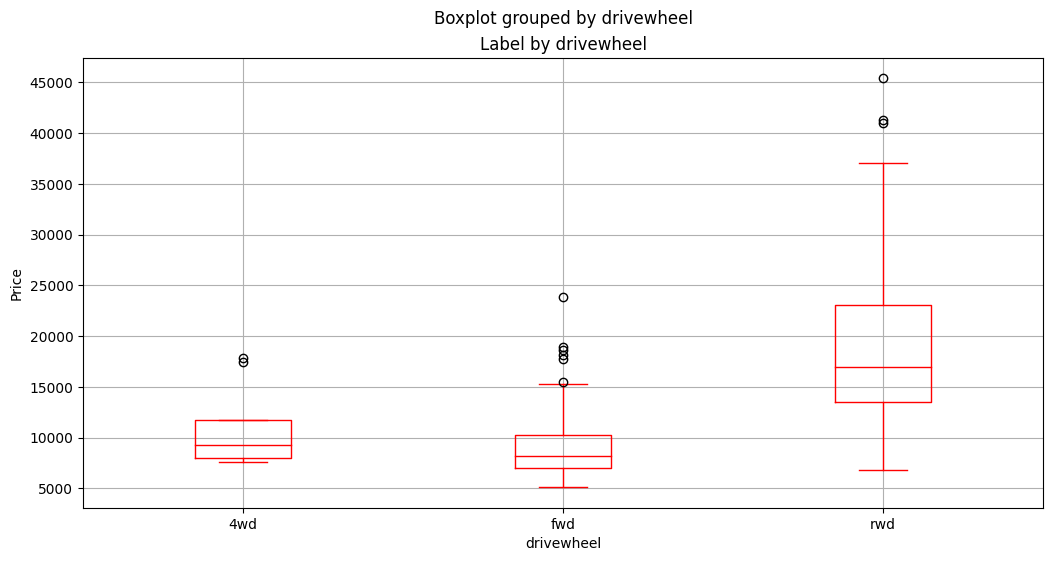

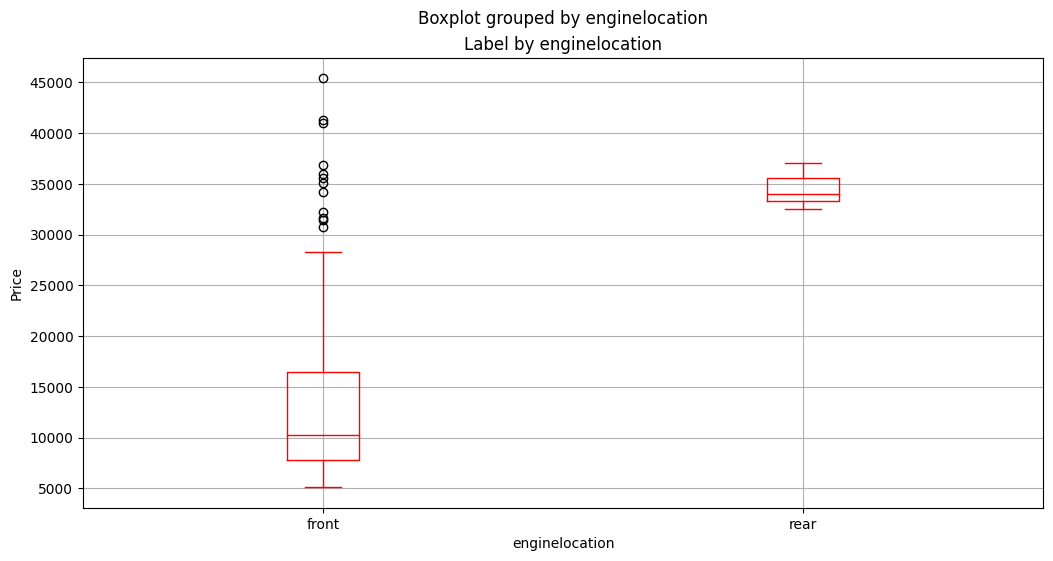

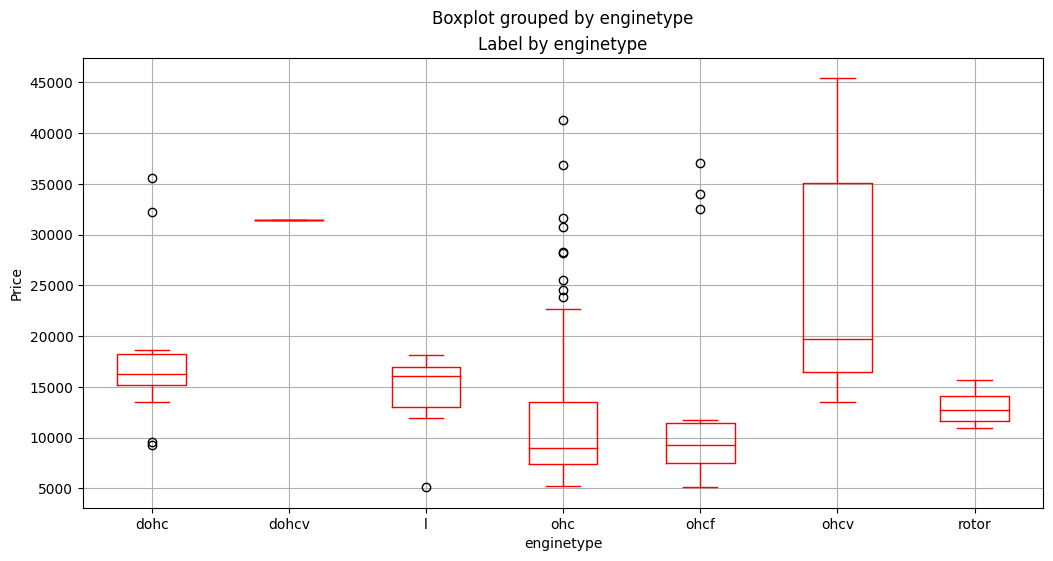

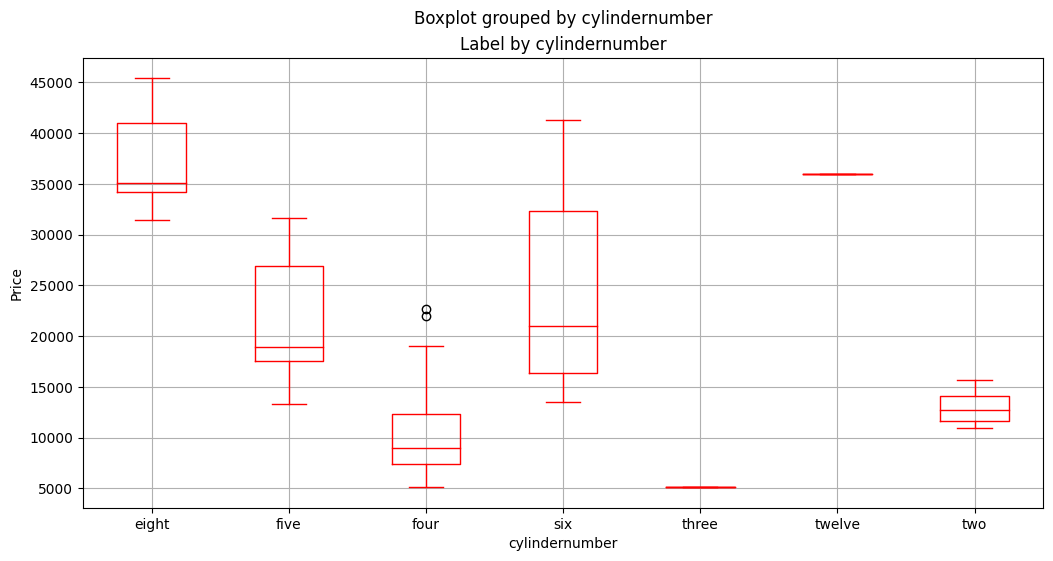

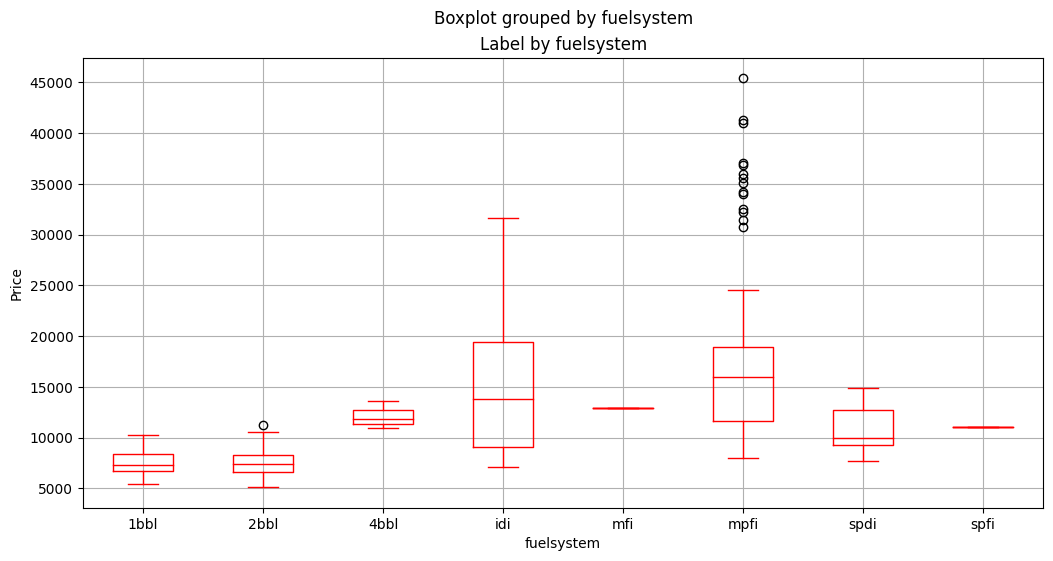

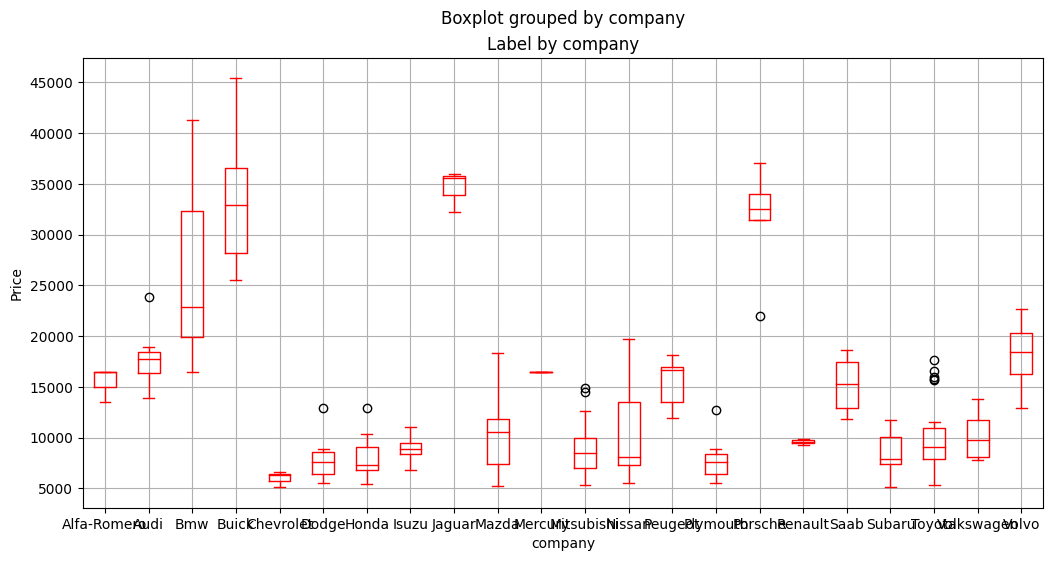

In [27]:
for col in categorical_features:
    fig = plt.figure(figsize=(12, 6))
    ax = fig.gca()
    df.boxplot(column = 'price', by = col, ax = ax,color='r')
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()


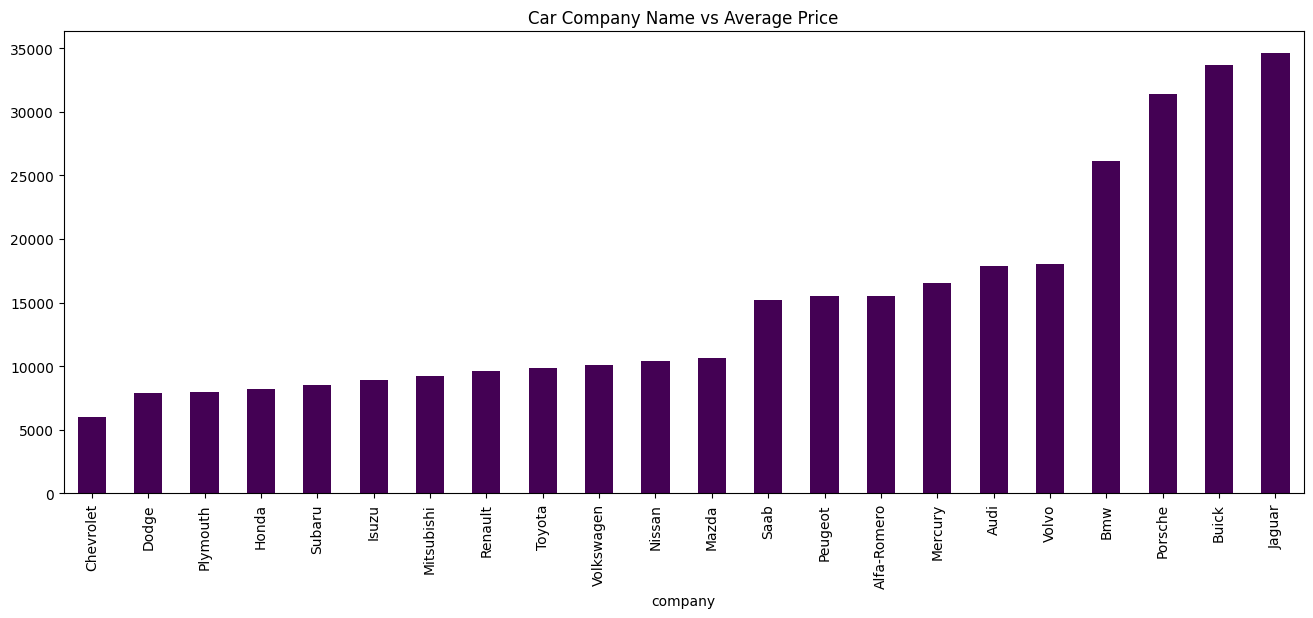

In [28]:
plt.figure(figsize=(16, 6))
avg_price=df.groupby(['company'])['price'].mean().sort_values(ascending=True)
avg_price.plot(kind='bar',cmap='viridis')
plt.title('Car Company Name vs Average Price')
plt.show()

In [29]:
df_avg=pd.DataFrame(avg_price)
df_avg.rename(columns={'price':'price_mean'},inplace=True)

In [30]:
df = df.merge(df_avg,on = 'company',how = 'left')


In [31]:
df['company_cat'] = df['price_mean'].apply(lambda x : 0 if x < 12000 else (1 if 12000 <= x < 24000 else 2))


In [32]:
df["company_cat"].value_counts()

company_cat
0    142
1     39
2     24
Name: count, dtype: int64

In [33]:
### Data encoding
#label encoding
df1=df.copy()
encoders_nums = {"fueltype":{"diesel":1,"gas":0},
                 "aspiration":{"turbo":1,"std":0},
                 "doornumber":     {"four": 4, "two": 2},
                 "drivewheel":{"fwd":0,"4wd":0,"rwd":1},
                 "cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }
                 }

df1 = df1.replace(encoders_nums)

In [34]:
# One hot encoding
df1 = pd.get_dummies(df1, columns=["carbody", "enginetype","fuelsystem"], prefix=["body", "etype","fsystem"],dtype=int,drop_first=True)


In [35]:
df1.head(3)

,car_ID,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area,company,price_mean,company_cat,body_hardtop,body_hatchback,body_sedan,body_wagon,etype_dohcv,etype_l,etype_ohc,etype_ohcf,etype_ohcv,etype_rotor,fsystem_2bbl,fsystem_4bbl,fsystem_idi,fsystem_mfi,fsystem_mpfi,fsystem_spdi,fsystem_spfi
0,1,3,0,0,2,1,front,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,23.4,10820.08,Alfa-Romero,15498.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,0,0,2,1,front,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,23.4,10820.08,Alfa-Romero,15498.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,0,0,2,1,front,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,21.8,11213.60,Alfa-Romero,15498.333333,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [36]:
features = numerical_features.copy()
features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_cat',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon', 'etype_l', 'etype_ohc', 'etype_ohcf',
       'etype_ohcv', 'fsystem_2bbl'
       , 'fsystem_idi', 'fsystem_mpfi',
       'fsystem_spdi'])

In [37]:
features

['enginesize',
 'compressionratio',
 'mileage',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'cylindernumber',
 'company_cat',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'etype_l',
 'etype_ohc',
 'etype_ohcf',
 'etype_ohcv',
 'fsystem_2bbl',
 'fsystem_idi',
 'fsystem_mpfi',
 'fsystem_spdi']

In [38]:
df1[features]

,enginesize,compressionratio,mileage,fueltype,aspiration,doornumber,drivewheel,cylindernumber,company_cat,body_hardtop,body_hatchback,body_sedan,body_wagon,etype_l,etype_ohc,etype_ohcf,etype_ohcv,fsystem_2bbl,fsystem_idi,fsystem_mpfi,fsystem_spdi
0,130,9.0,23.4,0,0,2,1,4,1,0,0,0,0,0,0,0,0,0,0,1,0
1,130,9.0,23.4,0,0,2,1,4,1,0,0,0,0,0,0,0,0,0,0,1,0
2,152,9.0,21.8,0,0,2,1,6,1,0,1,0,0,0,0,0,1,0,0,1,0
3,109,10.0,26.4,0,0,4,0,4,1,0,0,1,0,0,1,0,0,0,0,1,0
4,136,8.0,19.6,0,0,4,0,5,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,141,9.5,25.0,0,0,4,1,4,1,0,0,1,0,0,1,0,0,0,0,1,0
201,141,8.7,21.4,0,1,4,1,4,1,0,0,1,0,0,1,0,0,0,0,1,0
202,173,8.8,20.0,0,0,4,1,6,1,0,0,1,0,0,0,0,1,0,0,1,0
203,145,23.0,26.4,1,1,4,1,6,1,0,0,1,0,0,1,0,0,0,1,0,0


### Feature Scaling

In [39]:
from scipy.stats import zscore
X = df1[features].apply(zscore)

In [40]:
X

,enginesize,compressionratio,mileage,fueltype,aspiration,doornumber,drivewheel,cylindernumber,company_cat,body_hardtop,body_hatchback,body_sedan,body_wagon,etype_l,etype_ohc,etype_ohcf,etype_ohcv,fsystem_2bbl,fsystem_idi,fsystem_mpfi,fsystem_spdi
0,0.074449,-0.288349,-0.609359,-0.328798,-0.469295,-1.130388,1.302831,-0.352887,0.832184,-0.201517,-0.720082,-0.938474,-0.372678,-0.249351,-1.611363,-0.280976,-0.260208,-0.689072,-0.328798,1.086670,-0.214286
1,0.074449,-0.288349,-0.609359,-0.328798,-0.469295,-1.130388,1.302831,-0.352887,0.832184,-0.201517,-0.720082,-0.938474,-0.372678,-0.249351,-1.611363,-0.280976,-0.260208,-0.689072,-0.328798,1.086670,-0.214286
2,0.604046,-0.288349,-0.851157,-0.328798,-0.469295,-1.130388,1.302831,1.502032,0.832184,-0.201517,1.388730,-0.938474,-0.372678,-0.249351,-1.611363,-0.280976,3.843076,-0.689072,-0.328798,1.086670,-0.214286
3,-0.431076,-0.035973,-0.155989,-0.328798,-0.469295,0.884652,-0.767559,-0.352887,0.832184,-0.201517,-0.720082,1.065559,-0.372678,-0.249351,0.620593,-0.280976,-0.260208,-0.689072,-0.328798,1.086670,-0.214286
4,0.218885,-0.540725,-1.183629,-0.328798,-0.469295,0.884652,-0.767559,0.574572,0.832184,-0.201517,-0.720082,1.065559,-0.372678,-0.249351,0.620593,-0.280976,-0.260208,-0.689072,-0.328798,1.086670,-0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.339248,-0.162161,-0.367562,-0.328798,-0.469295,0.884652,1.302831,-0.352887,0.832184,-0.201517,-0.720082,1.065559,-0.372678,-0.249351,0.620593,-0.280976,-0.260208,-0.689072,-0.328798,1.086670,-0.214286
201,0.339248,-0.364062,-0.911606,-0.328798,2.130854,0.884652,1.302831,-0.352887,0.832184,-0.201517,-0.720082,1.065559,-0.372678,-0.249351,0.620593,-0.280976,-0.260208,-0.689072,-0.328798,1.086670,-0.214286
202,1.109571,-0.338824,-1.123179,-0.328798,-0.469295,0.884652,1.302831,1.502032,0.832184,-0.201517,-0.720082,1.065559,-0.372678,-0.249351,-1.611363,-0.280976,3.843076,-0.689072,-0.328798,1.086670,-0.214286
203,0.435538,3.244916,-0.155989,3.041381,2.130854,0.884652,1.302831,1.502032,0.832184,-0.201517,-0.720082,1.065559,-0.372678,-0.249351,0.620593,-0.280976,-0.260208,-0.689072,3.041381,-0.920243,-0.214286


In [41]:
y = np.log10(df1['price'])

In [42]:
y

0      4.130173
1      4.217484
2      4.217484
3      4.144574
4      4.241795
         ...   
200    4.226471
201    4.279781
202    4.332135
203    4.351603
204    4.354589
Name: price, Length: 205, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(164, 21)
(41, 21)


In [44]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Linear Regression

In [47]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [48]:
reg.score(X_train, y_train)

0.9273420415555296

In [49]:
print('coefficients: ', reg.coef_)
print('--'*40)
print('intercept: ',reg.intercept_)

coefficients:  [ 0.07156039  0.0462583  -0.07113183 -0.01292852  0.01851578  0.0144169
  0.01441222 -0.01390312  0.06876708 -0.01315637 -0.03142227 -0.03432787
 -0.0322008  -0.01830304 -0.00095636  0.00205398 -0.00133211 -0.02254693
 -0.01292852  0.00713713 -0.00919605]
--------------------------------------------------------------------------------
intercept:  4.05852739533243


In [50]:
y_pred = reg.predict(X_test)
y_pred

array([3.81970078, 4.1458919 , 4.17125389, 3.54322619, 4.00953207,
       4.08824179, 3.77449471, 3.8699319 , 4.17133405, 3.89566482,
       4.31588978, 4.3994226 , 4.04901037, 4.05871627, 3.78485484,
       4.08991599, 4.02801526, 4.17069438, 3.94798684, 3.85047405,
       3.97243234, 4.14277622, 4.0311053 , 4.08991599, 4.16737583,
       3.84865824, 3.86902907, 4.11316609, 3.89735887, 3.83647579,
       3.95375739, 3.97899715, 4.34485184, 3.98880043, 3.86552641,
       4.43978264, 4.05756318, 4.21265505, 3.82264793, 4.61386849,
       3.75580421])

In [51]:
# Since previously we apply log10 transformation on  dependent variable ,now reconverting to original form
MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 9608903.258154674
RMSE : 3099.8231011066864
R2 : 0.8758801953641813
Adjusted R2 :  0.7386951481351185


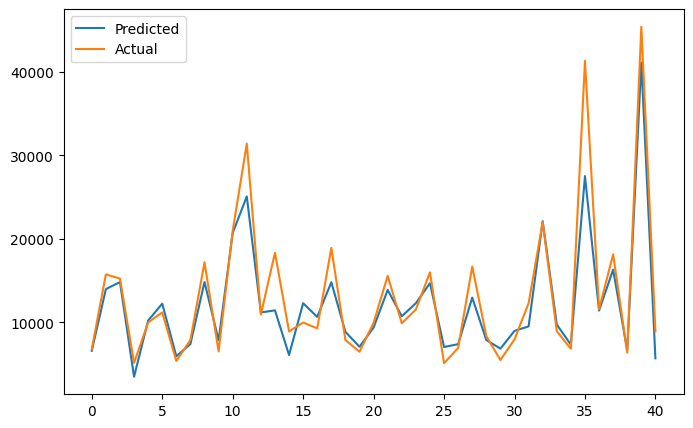

In [52]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred),label='Predicted')
plt.plot(np.array(10**(y_test)),label='Actual')
plt.legend()
plt.show()

### Lasso Regression

In [53]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [54]:
lasso.score(X_train, y_train)

0.9272224238957207

In [55]:
print('coefficients: ', lasso.coef_)
print('--'*40)
print('intercept: ',lasso.intercept_)

coefficients:  [ 0.06855242  0.02714891 -0.07045567 -0.00070637  0.01674895  0.0137731
  0.015169   -0.01132238  0.06889297 -0.01165267 -0.02878284 -0.03104852
 -0.02985191 -0.01925698 -0.00160206  0.00178781 -0.00162133 -0.02259841
 -0.00525001  0.00745823 -0.00951763]
--------------------------------------------------------------------------------
intercept:  4.058554693196255


In [56]:
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso

array([3.82102915, 4.14874348, 4.1748041 , 3.54089365, 4.0046457 ,
       4.08790494, 3.77431205, 3.87101214, 4.17224132, 3.8958416 ,
       4.31938875, 4.40025195, 4.0467899 , 4.06273051, 3.78370411,
       4.08738024, 4.0281144 , 4.17355349, 3.9476    , 3.85043274,
       3.97274807, 4.14318003, 4.03088967, 4.08738024, 4.16870627,
       3.84988948, 3.86945699, 4.11417607, 3.89653566, 3.83640559,
       3.9551341 , 3.97943751, 4.34092433, 3.98950798, 3.86415894,
       4.44429412, 4.05439103, 4.20836865, 3.82211961, 4.61736766,
       3.75595076])

In [57]:
# Since previously we apply log10 transformation on  dependent variable ,now reconverting to original form
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 9264877.988982724
RMSE : 3043.826208735105
R2 : 0.8803240270952551
Adjusted R2 :  0.7480505833584319


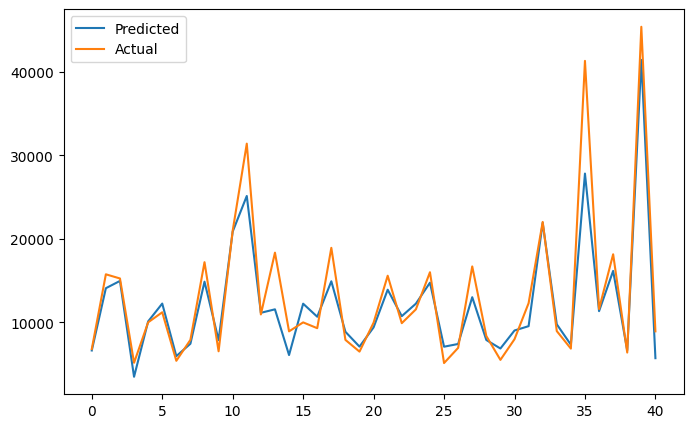

In [58]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso),label='Predicted')
plt.plot(np.array(10**(y_test)),label='Actual')
plt.legend()
plt.show()

### Ridge Regression

In [59]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [60]:
ridge.score(X_train, y_train)

0.9271576267193158

In [61]:
print('coefficients: ', ridge.coef_)
print('--'*40)
print('intercept: ',ridge.intercept_)

coefficients:  [ 0.06743564  0.02573232 -0.06958557 -0.0023434   0.01692969  0.0138084
  0.01592786 -0.00995007  0.0684264  -0.01098544 -0.02712617 -0.02925767
 -0.02854643 -0.01954939 -0.00221996  0.00162924 -0.00215263 -0.02259998
 -0.0023434   0.00798814 -0.00938471]
--------------------------------------------------------------------------------
intercept:  4.058611902619227


In [62]:
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge

array([3.82132768, 4.15253527, 4.17420151, 3.54273199, 4.00462606,
       4.08823446, 3.77507185, 3.87121966, 4.17287244, 3.89575582,
       4.3203396 , 4.4033106 , 4.0460246 , 4.06329768, 3.78479672,
       4.08775788, 4.02805251, 4.17342262, 3.94681253, 3.85077551,
       3.97314224, 4.14349379, 4.03026074, 4.08775788, 4.17162643,
       3.85069175, 3.86960229, 4.11489042, 3.89627007, 3.83644254,
       3.95558493, 3.98004448, 4.33919467, 3.9899455 , 3.86426702,
       4.44368266, 4.05093203, 4.20852416, 3.82230202, 4.61533009,
       3.75697223])

In [63]:
# Since previously we apply log10 transformation on  dependent variable ,now reconverting to original form
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 9245887.399245635
RMSE : 3040.705082582925
R2 : 0.8805693317075257
Adjusted R2 :  0.7485670141211067


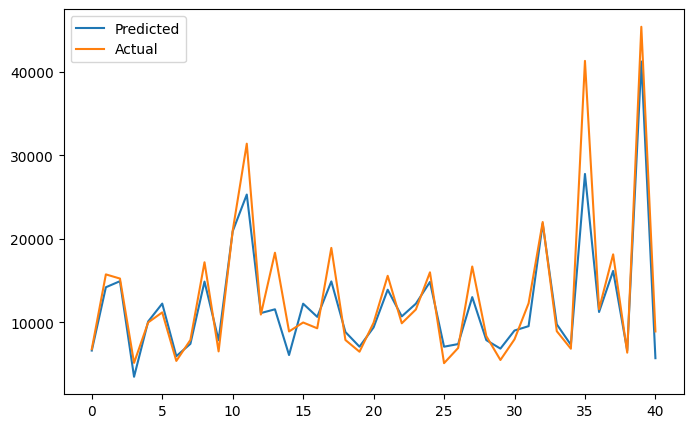

In [64]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge),label='Predicted')
plt.plot(np.array(10**(y_test)),label='Actual')
plt.legend()
plt.show()

### ElasticNet

In [65]:
#  a* L2 + b* L1 
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [66]:
# elastic = ElasticNet()
# parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
# elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
# elastic_regressor.fit(X_train, y_train)

In [67]:
elasticnet.score(X_train, y_train)

0.8099052859923915

In [68]:
print('coefficients: ', elasticnet.coef_)
print('--'*40)
print('intercept: ',elasticnet.intercept_)

coefficients:  [ 0.04775722  0.         -0.04047141  0.          0.          0.
  0.00174964  0.          0.06436101  0.         -0.          0.
 -0.          0.         -0.          0.          0.         -0.01269776
  0.          0.         -0.        ]
--------------------------------------------------------------------------------
intercept:  4.063316638714451


In [69]:
y_pred_en = elasticnet.predict(X_test)

In [70]:
# Since previously we apply log10 transformation on  dependent variable ,now reconverting to original form
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 19925825.06482187
RMSE : 4463.835241675242
R2 : 0.7426147971513504
Adjusted R2 :  0.45813641505547453


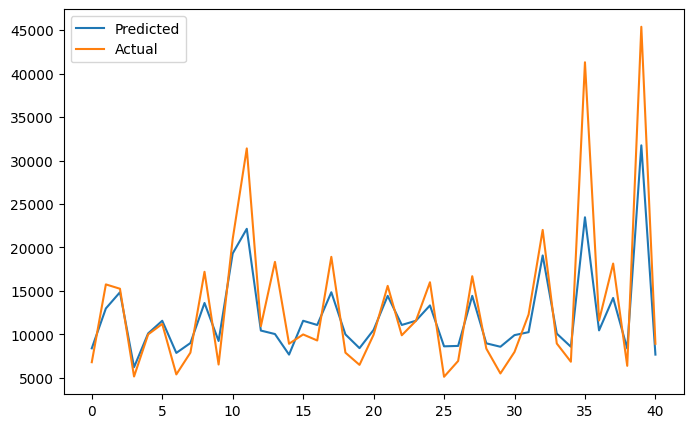

In [71]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_en),label='Predicted')
plt.plot(np.array(10**(y_test)),label='Actual')
plt.legend()
plt.show()

### GridSearchCV

In [72]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
gs_ridge=GridSearchCV(estimator=ridge,param_grid=parameters, scoring='neg_mean_squared_error', cv=5,verbose=2)
gs_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] END ........................................alpha=1e-15; total time=   0.0s
[CV] END ........................................alpha=1e-15; total time=   0.0s
[CV] END ........................................alpha=1e-15; total time=   0.0s
[CV] END ........................................alpha=1e-15; total time=   0.0s
[CV] END ........................................alpha=1e-15; total time=   0.0s
[CV] END ........................................alpha=1e-13; total time=   0.0s
[CV] END ........................................alpha=1e-13; total time=   0.0s
[CV] END ........................................alpha=1e-13; total time=   0.0s
[CV] END ........................................alpha=1e-13; total time=   0.0s
[CV] END ........................................alpha=1e-13; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ......................................

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error', verbose=2)

In [73]:
gs_ridge.best_params_

{'alpha': 10}

In [75]:
gs_ridge.best_estimator_

Ridge(alpha=10)

In [76]:
print(" the negative mean squared error is: ", gs_ridge.best_score_)


 the negative mean squared error is:  -0.004895315103397837


In [77]:
y_pred_gs_ridge=gs_ridge.predict(X_test)
y_pred_gs_ridge

array([3.82678027, 4.17547573, 4.17706902, 3.56252403, 4.00338206,
       4.09426832, 3.78242379, 3.87586175, 4.18219427, 3.89692611,
       4.33141838, 4.4187247 , 4.03325785, 4.069575  , 3.79249121,
       4.08938053, 4.02890219, 4.17541874, 3.94226098, 3.85114443,
       3.97935935, 4.15215159, 4.02759437, 4.08938053, 4.18790661,
       3.8565515 , 3.87191035, 4.1274934 , 3.89216095, 3.84244867,
       3.96507408, 3.98663251, 4.32306408, 3.99358044, 3.86545658,
       4.44290771, 4.02514513, 4.19795938, 3.82612868, 4.60601645,
       3.7694833 ])

In [78]:
# Since previously we apply log10 transformation on  dependent variable ,now reconverting to original form
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_gs_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_gs_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_gs_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 9030619.297229806
RMSE : 3005.098883103484
R2 : 0.8833499856540469
Adjusted R2 :  0.7544210224295724


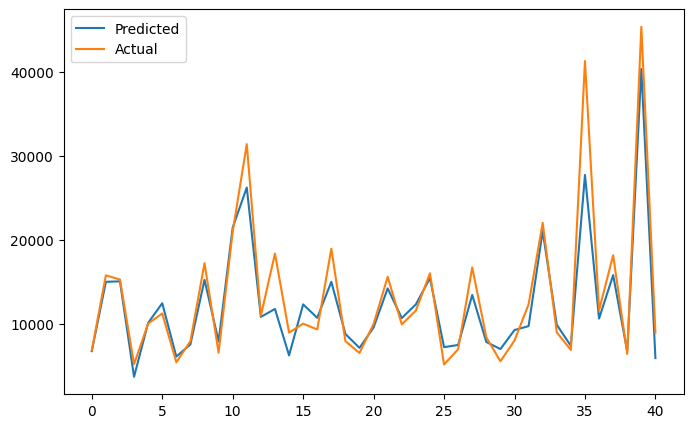

In [79]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_gs_ridge),label='Predicted')
plt.plot(10**(np.array(y_test)),label='Actual')
plt.legend()
plt.show()
